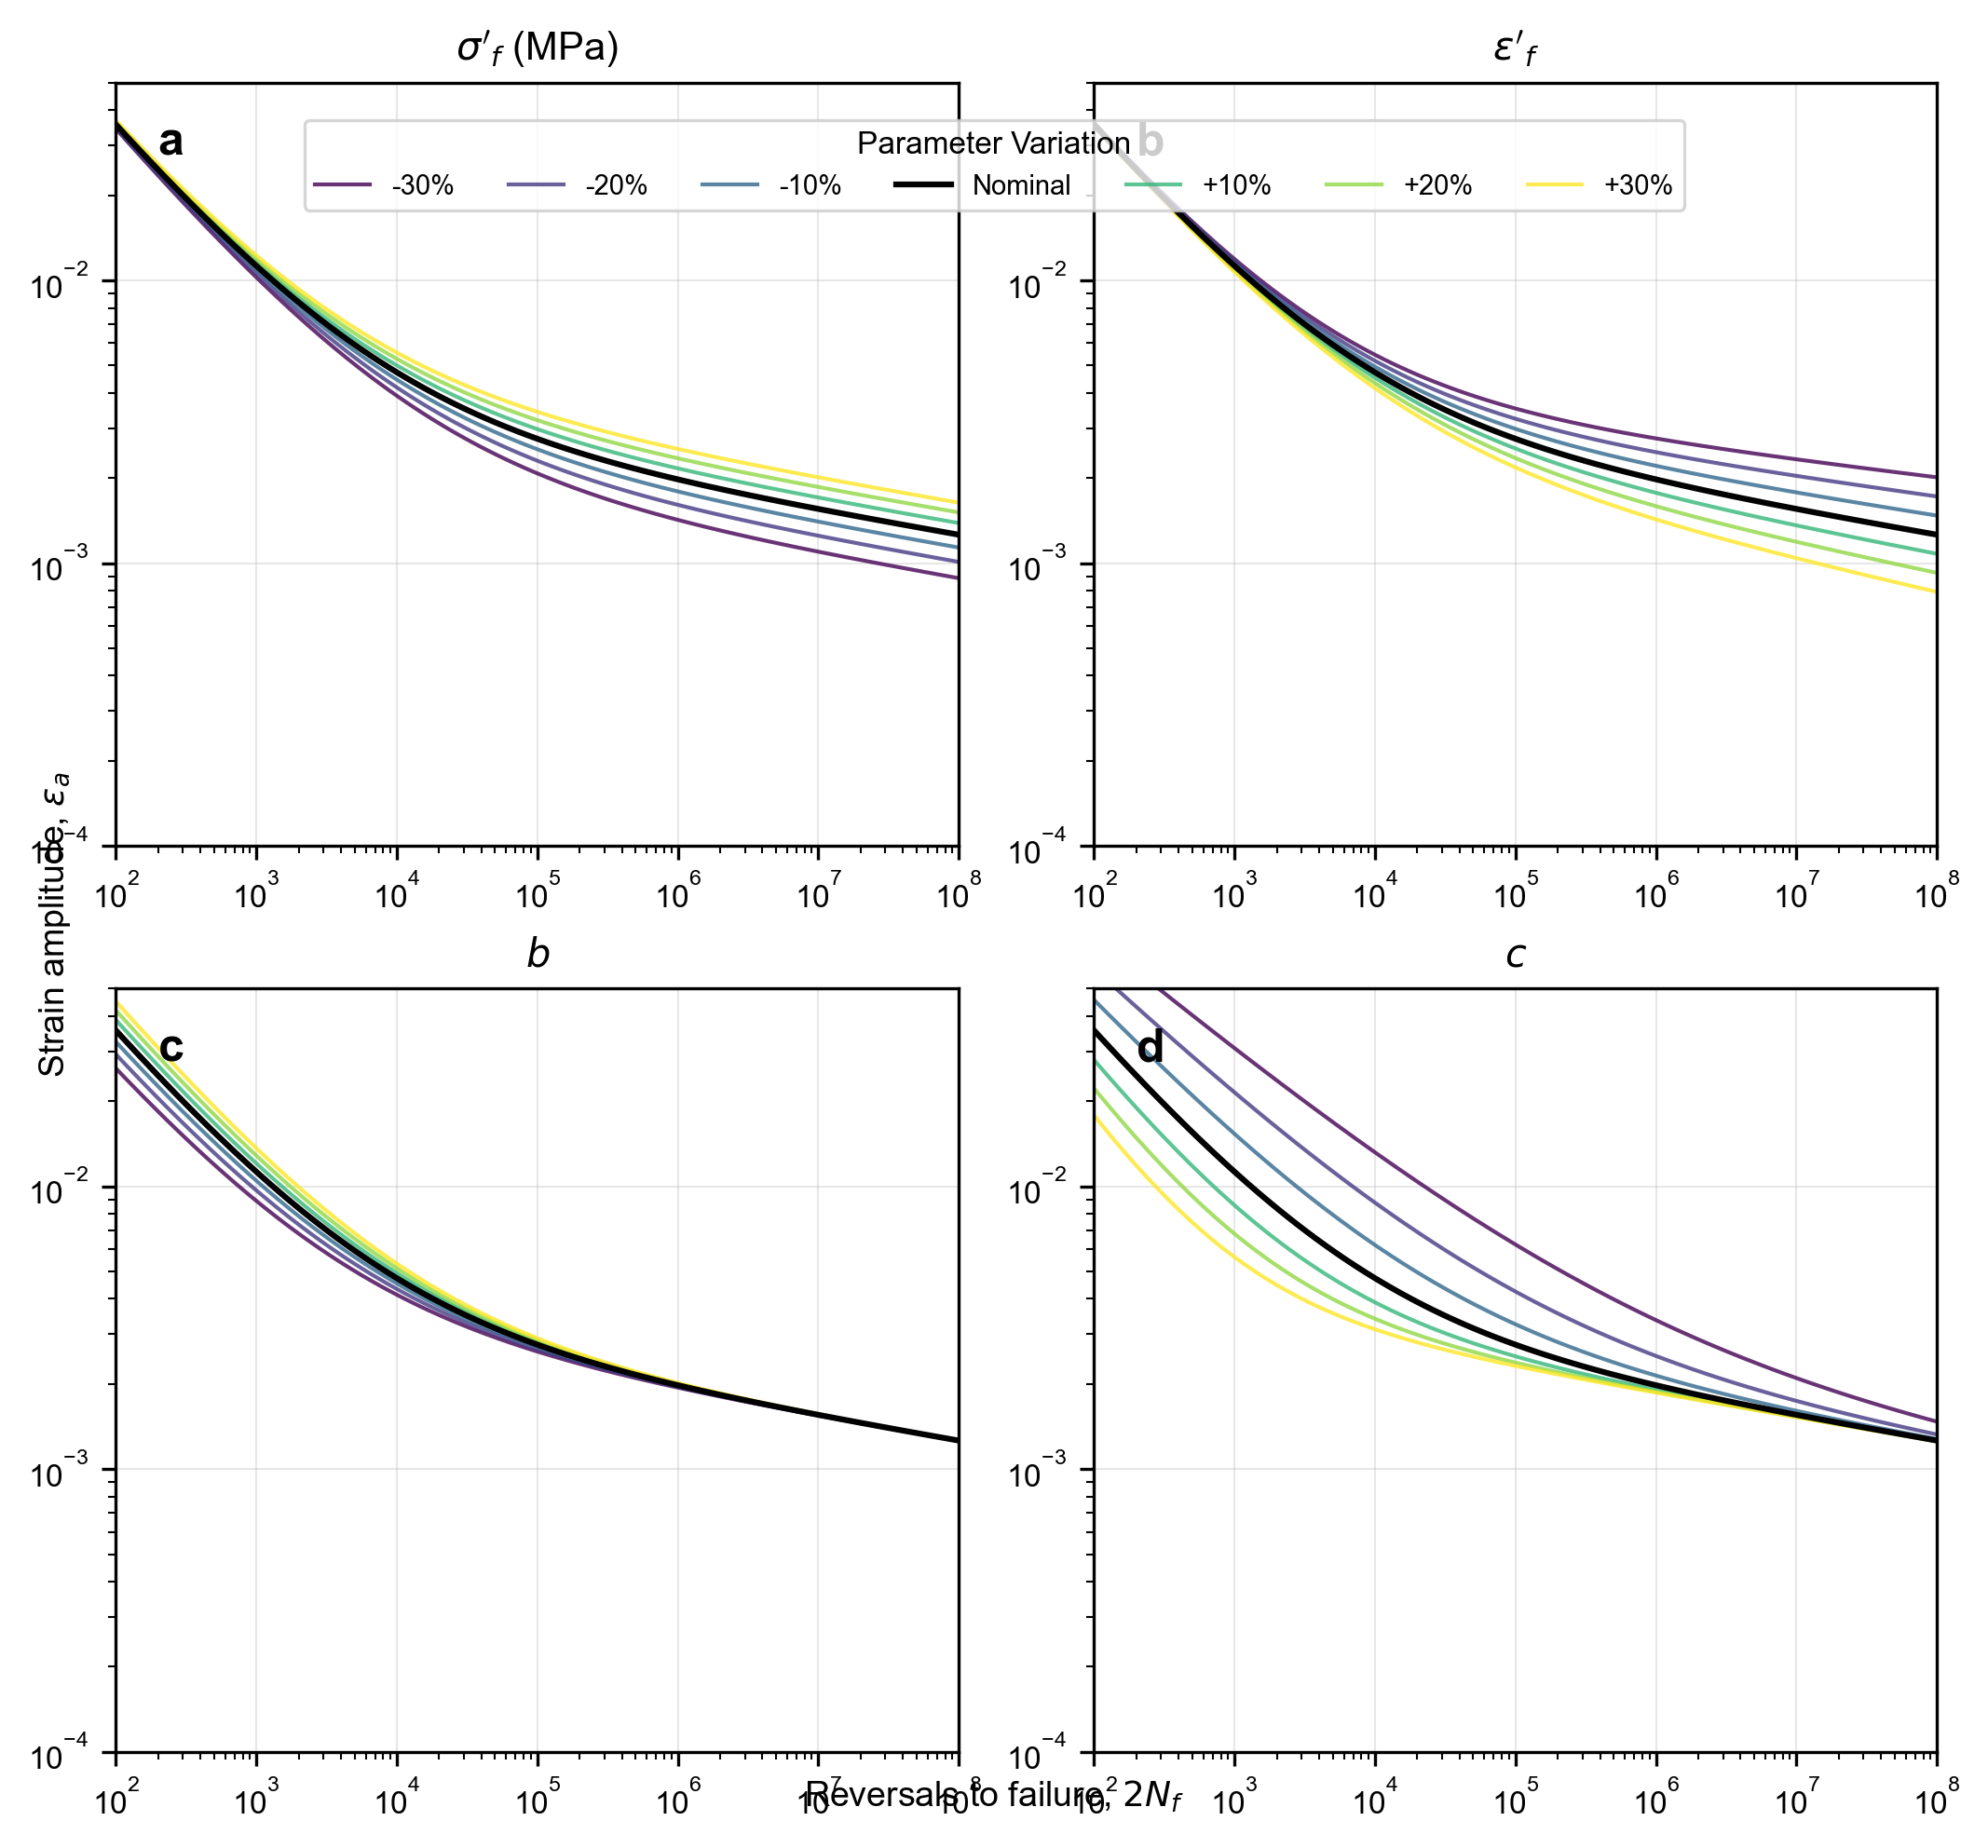



                                ÎØºÍ∞êÎèÑ Î∂ÑÏÑù ÏàòÏπò ÏöîÏïΩ Í≤∞Í≥º                                 

--- sigma_f' ÎØºÍ∞êÎèÑÏóê Îî∞Î•∏ Strain Amplitude Î≤îÏúÑ (-30% ~ 30%) ---
----------------------------------------------------------------------------------
  Target 2Nf |     Min Strain |     Max Strain |   Nominal Strain |   Strain Range
----------------------------------------------------------------------------------
     1.0e+03 |       0.010259 |       0.012261 |         0.011260 |       0.002001
     5.0e+03 |       0.005053 |       0.006799 |         0.005926 |       0.001745
     1.0e+04 |       0.003910 |       0.005556 |         0.004733 |       0.001646
     5.0e+04 |       0.002432 |       0.003867 |         0.003150 |       0.001435
     1.0e+05 |       0.002079 |       0.003432 |         0.002755 |       0.001353
     5.0e+05 |       0.001567 |       0.002747 |         0.002157 |       0.001180
     1.0e+06 |       0.001424 |       0.002536 |         0.001980 |      

In [25]:
# Cell 0: spf, epf, b, c ÎØºÍ∞êÎèÑ Î∂ÑÏÑù (Nature Ïä§ÌÉÄÏùº 2x2 ÌîåÎ°Ø Î∞è ÏàòÏπò ÏöîÏïΩ Í∞ïÌôî)
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import fsolve
import warnings

# --- [ÏàòÏ†ï 1] Nature Ï†ÄÎÑê Ïä§ÌÉÄÏùº Matplotlib Ï†ÑÏó≠ ÏÑ§Ï†ï ---
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams['mathtext.fontset'] = 'dejavusans'
plt.rcParams['font.size'] = 8  # Í∏∞Î≥∏ Ìè∞Ìä∏ ÌÅ¨Í∏∞
plt.rcParams['axes.labelsize'] = 9  # Ï∂ï Î†àÏù¥Î∏î
plt.rcParams['axes.titlesize'] = 10 # ÏÑúÎ∏åÌîåÎ°Ø Ï†úÎ™©
plt.rcParams['legend.fontsize'] = 7
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['lines.linewidth'] = 1.0
plt.rcParams['axes.linewidth'] = 0.8 # Ï∂ï ÏÑ† ÎëêÍªò
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['figure.constrained_layout.use'] = True # Î†àÏù¥ÏïÑÏõÉ ÏûêÎèô Ï°∞Ï†ï

# --- Í∏∞Î≥∏ ÏÑ§Ï†ï Î∞è Í≥µÏπ≠ ÌååÎùºÎØ∏ÌÑ∞ Ï†ïÏùò ---
SPF_NOMINAL = 1200.0
B_NOMINAL = -0.085
EPF_NOMINAL = 0.50
C_NOMINAL = -0.60
E_MPA_NOMINAL = 200000.0
TARGET_2NF_LEVELS = np.array([1e3, 5e3, 1e4, 5e4, 1e5, 5e5, 1e6, 1e7])
DEFINED_STRAIN_AMPLITUDES = np.logspace(np.log10(0.001), np.log10(0.02), 50)

# --- Coffin-Manson Í¥ÄÎ†® Ìï®ÏàòÎì§ (ÏàòÏ†ïÎêú Î≤ÑÏ†Ñ) ---
def calculate_strain_amplitude(params, E_val, two_Nf_target):
    """
    Ï£ºÏñ¥ÏßÑ 2Nf(Ïä§ÏπºÎùº ÎòêÎäî Î∞∞Ïó¥)ÏóêÏÑú Î≥ÄÌòïÎ•† ÏßÑÌè≠ÏùÑ Í≥ÑÏÇ∞Ìï©ÎãàÎã§.
    Î∞∞Ïó¥ ÏûÖÎ†•Ïóê ÎåÄÌï¥ Í∞ïÍ±¥ÌïòÍ≤å ÎèôÏûëÌïòÎèÑÎ°ù ÏàòÏ†ïÎêòÏóàÏäµÎãàÎã§.
    """
    spf, b_exp, epf, c_exp = params
    
    # Ïä§ÏπºÎùº ÌååÎùºÎØ∏ÌÑ∞ Ïú†Ìö®ÏÑ± Í≤ÄÏÇ¨
    if any(v is None for v in [spf, b_exp, epf, c_exp, E_val]) or np.isnan([spf, b_exp, epf, c_exp, E_val]).any():
        # ÌååÎùºÎØ∏ÌÑ∞Í∞Ä Ïú†Ìö®ÌïòÏßÄ ÏïäÏúºÎ©¥ ÏûÖÎ†• ÌòïÌÉúÏóê Îî∞Îùº nan ÎòêÎäî nan Î∞∞Ïó¥ Î∞òÌôò
        return np.nan if np.isscalar(two_Nf_target) else np.full_like(np.asanyarray(two_Nf_target), np.nan, dtype=float)

    # ÏûÖÎ†•Í∞íÏùÑ Ìï≠ÏÉÅ numpy Î∞∞Ïó¥Î°ú Ï≤òÎ¶¨ÌïòÏó¨ Î≤°ÌÑ∞Ìôî Ïó∞ÏÇ∞ Ï§ÄÎπÑ
    two_Nf_array = np.asanyarray(two_Nf_target)
    
    # Í≥ÑÏÇ∞ Ïò§Î•òÎ•º Î∞©ÏßÄÌïòÍ∏∞ ÏúÑÌï¥ 0 Ïù¥ÌïòÏùò Í∞íÏùÑ nanÏúºÎ°ú Î≥ÄÍ≤Ω
    safe_two_Nf = np.where(two_Nf_array > 0, two_Nf_array, np.nan)

    try:
        # Î≤°ÌÑ∞ÌôîÎêú Coffin-Manson Í≥ÑÏÇ∞
        term1 = (spf / E_val) * np.power(safe_two_Nf, b_exp)
        term2 = epf * np.power(safe_two_Nf, c_exp)
        result = term1 + term2
        
        # ÏõêÎûò ÏûÖÎ†•Ïù¥ Ïä§ÏπºÎùºÏòÄÎã§Î©¥ Í≤∞Í≥ºÎèÑ Ïä§ÏπºÎùºÎ°ú Î∞òÌôò
        return result.item() if np.isscalar(two_Nf_target) else result
        
    except (OverflowError, ValueError):
        # ÏòàÏô∏ Î∞úÏÉù Ïãú ÏûÖÎ†• ÌòïÌÉúÏóê ÎßûÏ∂∞ nan ÎòêÎäî nan Î∞∞Ïó¥ Î∞òÌôò
        return np.nan if np.isscalar(two_Nf_target) else np.full_like(two_Nf_array, np.nan, dtype=float)

# --- [ÏàòÏ†ï 2] Î™®Îì† ÌååÎùºÎØ∏ÌÑ∞Ïùò ÎØºÍ∞êÎèÑÎ•º 2x2 Í∑∏Î¶¨ÎìúÏóê ÌîåÎ°úÌåÖÌïòÎäî ÎßàÏä§ÌÑ∞ Ìï®Ïàò ---
def plot_all_sensitivities_2x2(nominal_values, E_mpa, percentage_changes, 
                               strain_amplitudes_for_curve, target_2Nf_for_error_analysis):
    """4Í∞ú ÌååÎùºÎØ∏ÌÑ∞ ÎØºÍ∞êÎèÑ Î∂ÑÏÑùÏùÑ ÌïòÎÇòÏùò 2x2 ÌîåÎ°ØÏóê Í∑∏Î¶¨Í≥†, Î∂ÑÏÑù Îç∞Ïù¥ÌÑ∞Î•º Î∞òÌôòÌï©ÎãàÎã§."""
    
    param_configs = {
        'spf': {'label': r"$\sigma'_f$ (MPa)", 'ax_pos': (0, 0), 'panel_label': 'a'},
        'epf': {'label': r"$\varepsilon'_f$", 'ax_pos': (0, 1), 'panel_label': 'b'},
        'b':   {'label': r"$b$", 'ax_pos': (1, 0), 'panel_label': 'c'},
        'c':   {'label': r"$c$", 'ax_pos': (1, 1), 'panel_label': 'd'}
    }
    
    fig, axes = plt.subplots(2, 2, figsize=(7, 6.5)) # Î†àÏ†ÑÎìú Í≥µÍ∞ÑÏùÑ ÏúÑÌï¥ ÎÜíÏù¥ Ï¶ùÍ∞Ä
    all_dfs = {}
    
    colors = plt.cm.viridis(np.linspace(0, 1, len(percentage_changes)))

    for param_name, config in param_configs.items():
        ax = axes[config['ax_pos']]
        all_sensitivity_data = []
        
        nominal_params_list = list(nominal_values)
        param_idx = list(param_configs.keys()).index(param_name)
        
        # Í∞Å ÌååÎùºÎØ∏ÌÑ∞ Í∞í Î≥ÄÌôîÏóê Îî∞Î•∏ Í≥°ÏÑ† ÌîåÎ°Ø
        for i, p_change in enumerate(percentage_changes):
            current_params = list(nominal_params_list)
            varied_val = current_params[param_idx] * (1 + p_change / 100.0)
            current_params[param_idx] = varied_val
            
            # Í≥°ÏÑ† Îç∞Ïù¥ÌÑ∞ ÏÉùÏÑ± (Í≥ÑÏÇ∞ Í∞ÑÏÜåÌôî)
            reversals_for_plot = np.logspace(2, 8, 100)
            strains_for_plot = calculate_strain_amplitude(current_params, E_mpa, reversals_for_plot)
            
            # Í≥µÏπ≠Í∞í(0% Î≥ÄÌôî)ÏùÄ Í≤ÄÏ†ïÏÉâÏúºÎ°ú Í∞ïÏ°∞
            if p_change == 0:
                ax.plot(reversals_for_plot, strains_for_plot, color='black', linewidth=1.5, label='Nominal', zorder=10)
            else:
                ax.plot(reversals_for_plot, strains_for_plot, color=colors[i], alpha=0.8, label=f"{p_change:+d}%")

            # ÏàòÏπò Î∂ÑÏÑùÏö© Îç∞Ïù¥ÌÑ∞ ÏÉùÏÑ±
            for t_2Nf in target_2Nf_for_error_analysis:
                strain_at_t_2Nf = calculate_strain_amplitude(current_params, E_mpa, t_2Nf)
                all_sensitivity_data.append({'param_change_percent': p_change, 'target_2Nf': t_2Nf, 
                                             'strain_amplitude_calc': strain_at_t_2Nf})
        
        all_dfs[param_name] = pd.DataFrame(all_sensitivity_data)
        
        # ÏÑúÎ∏åÌîåÎ°Ø Ïä§ÌÉÄÏùºÎßÅ
        ax.set_xscale('log'); ax.set_yscale('log')
        ax.grid(True, which="major", ls="-", alpha=0.3, linewidth=0.5)
        ax.set_xlim(1e2, 1e8); ax.set_ylim(1e-4, 5e-2)
        ax.set_title(config['label'], loc='center')
        ax.text(0.05, 0.95, config['panel_label'], transform=ax.transAxes, 
                fontsize=12, fontweight='bold', va='top')

    # Î≤îÎ°ÄÎäî Í∑∏Î¶º Îß® ÏúÑÏóê ÌïòÎÇòÎ°ú ÌÜµÌï©
    handles, labels = axes[0,0].get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0.95), ncol=len(percentage_changes), title='Parameter Variation')

    # Í≥µÌÜµ Ï∂ï Î†àÏù¥Î∏î ÏÑ§Ï†ï
    fig.text(0.5, 0.02, r'Reversals to failure, $2N_f$', ha='center', va='center', fontsize=9)
    fig.text(0.02, 0.5, r'Strain amplitude, $\varepsilon_a$', ha='center', va='center', rotation='vertical', fontsize=9)
    
    plt.show()
    return all_dfs['spf'], all_dfs['epf'], all_dfs['b'], all_dfs['c']


# --- [ÏàòÏ†ï 3] ÎØºÍ∞êÎèÑ ÏöîÏïΩ ÌÖåÏù¥Î∏î Ï∂úÎ†• Ìï®Ïàò (Strain Range Ï∂îÍ∞Ä) ---
def print_sensitivity_summary(df_sensitivity, param_name, nominal_value_str, variation_range):
    """ÎØºÍ∞êÎèÑ Î∂ÑÏÑù Í≤∞Í≥ºÎ•º ÏöîÏïΩÌïòÏó¨ ÌëúÎ°ú Ï∂úÎ†•Ìï©ÎãàÎã§."""
    if df_sensitivity.empty:
        print(f"\n--- {param_name}Ïóê ÎåÄÌïú ÎØºÍ∞êÎèÑ ÏöîÏïΩ Í≤∞Í≥º ÏóÜÏùå ---")
        return

    # Í≥µÏπ≠Í∞íÏùº ÎïåÏùò Î≥ÄÌòïÎ•† Í≥ÑÏÇ∞
    nominal_params = [SPF_NOMINAL, B_NOMINAL, EPF_NOMINAL, C_NOMINAL]
    df_sensitivity['strain_amplitude_nominal'] = df_sensitivity['target_2Nf'].apply(lambda x: calculate_strain_amplitude(nominal_params, E_MPA_NOMINAL, x))

    summary = df_sensitivity.groupby('target_2Nf').agg(
        min_strain=('strain_amplitude_calc', 'min'),
        max_strain=('strain_amplitude_calc', 'max'),
        nominal_strain=('strain_amplitude_nominal', 'first')
    ).reset_index()
    
    # Strain Range Í≥ÑÏÇ∞
    summary['strain_range'] = summary['max_strain'] - summary['min_strain']

    print(f"\n--- {param_name} ÎØºÍ∞êÎèÑÏóê Îî∞Î•∏ Strain Amplitude Î≤îÏúÑ ({variation_range[0]}% ~ {variation_range[-1]}%) ---")
    
    header = f"{'Target 2Nf':>12s} | {'Min Strain':>14s} | {'Max Strain':>14s} | {'Nominal Strain':>16s} | {'Strain Range':>14s}"
    print("-" * len(header))
    print(header)
    print("-" * len(header))
    for _, row in summary.iterrows():
        print(f"{row['target_2Nf']:>12.1e} | {row['min_strain']:>14.6f} | {row['max_strain']:>14.6f} | {row['nominal_strain']:>16.6f} | {row['strain_range']:>14.6f}")
    print("-" * len(header))


# --- Î©îÏù∏ Ïã§Ìñâ Î∂ÄÎ∂Ñ ---
if __name__ == "__main__":
    nominal_fatigue_params = [SPF_NOMINAL, B_NOMINAL, EPF_NOMINAL, C_NOMINAL]
    param_variation_percentages = [-30, -20, -10, 0, 10, 20, 30]

    # 2x2 ÌîåÎ°Ø ÏÉùÏÑ± Î∞è Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ Î∞òÌôò
    df_spf, df_epf, df_b, df_c = plot_all_sensitivities_2x2(
        nominal_values=nominal_fatigue_params,
        E_mpa=E_MPA_NOMINAL,
        percentage_changes=param_variation_percentages,
        strain_amplitudes_for_curve=DEFINED_STRAIN_AMPLITUDES,
        target_2Nf_for_error_analysis=TARGET_2NF_LEVELS
    )
    
    # ÏµúÏ¢Ö ÏàòÏπò ÏöîÏïΩ Í≤∞Í≥º Ï∂úÎ†•
    print("\n\n" + "="*80)
    print("ÎØºÍ∞êÎèÑ Î∂ÑÏÑù ÏàòÏπò ÏöîÏïΩ Í≤∞Í≥º".center(80))
    print("="*80)
    
    print_sensitivity_summary(df_spf, "sigma_f'", f"{SPF_NOMINAL:.1f} MPa", param_variation_percentages)
    print_sensitivity_summary(df_epf, "epsilon_f'", f"{EPF_NOMINAL:.3f}", param_variation_percentages)
    print_sensitivity_summary(df_b, "b", f"{B_NOMINAL:.4f}", param_variation_percentages)
    print_sensitivity_summary(df_c, "c", f"{C_NOMINAL:.4f}", param_variation_percentages)

In [3]:
# Cell 1: ÎùºÏù¥Î∏åÎü¨Î¶¨ ÏûÑÌè¨Ìä∏ Î∞è ÏÑ§Ï†ï
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.optimize import fsolve
import warnings
from sklearn.metrics import r2_score, mean_squared_error
import joblib # Ïä§ÏºÄÏùºÎü¨ Î∞è target_cols Î°úÎìúÏö©
import seaborn as sns # palette Î°úÎìúÏö©

# Times New Roman Ìè∞Ìä∏ ÏÑ§Ï†ï Îì± (main0605.ipynb Cell 13Í≥º ÎèôÏùºÌïòÍ≤å)
mpl.rcParams.update({
    'font.family': 'serif', 'font.serif': 'Times New Roman', 'font.size': 12,
    'axes.labelsize': 20, 'axes.titlesize': 14, 'legend.fontsize': 10,
    'xtick.labelsize': 11, 'ytick.labelsize': 11, 'lines.linewidth': 1.8,
    'axes.grid': True, 'grid.alpha': 0.3, 'figure.dpi': 300,
    'axes.unicode_minus': False
})

# ÏÉâÏÉÅ ÌåîÎ†àÌä∏ (main0605.ipynb Cell 10Í≥º ÎèôÏùºÌïòÍ≤å)
# palette = sns.color_palette("colorblind")
# ÎòêÎäî ÏßÅÏ†ë ÏßÄÏ†ï
palette = [(0.00392156862745098, 0.45098039215686275, 0.6980392156862745), # blue
           (0.8901960784313725, 0.10196078431372549, 0.10980392156862745), # red
           (0.21568627450980393, 0.6078431372549019, 0.3058823529411765),  # green
           (0.5058823529411764, 0.4470588235294118, 0.6980392156862745),  # purple
           (0.9921568627450981, 0.5529411764705883, 0.23529411764705882), # orange
           (0.6, 0.6, 0.6)] # grey for other lines if needed

print("ÎùºÏù¥Î∏åÎü¨Î¶¨ ÏûÑÌè¨Ìä∏ Î∞è ÏÑ§Ï†ï ÏôÑÎ£å.")

ÎùºÏù¥Î∏åÎü¨Î¶¨ ÏûÑÌè¨Ìä∏ Î∞è ÏÑ§Ï†ï ÏôÑÎ£å.


In [10]:
# Cell 2: Îç∞Ïù¥ÌÑ∞ Î°úÎî© Î∞è Î≥ÄÏàò Ï†ïÏùò
try:
    all_preds_orig_np = np.load('all_preds_orig_for_cell13.npy')
    all_targets_orig_np = np.load('all_targets_orig_for_cell13.npy')
    E_values_all_samples_np = np.load('E_test_for_cell13.npy')

    # scalers_y.pklÏóêÏÑú target_cols Î°úÎìú
    scalers_y_data = joblib.load('scalers_y.pkl')
    target_cols = scalers_y_data['target_cols']
    
    print("Îç∞Ïù¥ÌÑ∞ Î°úÎî© ÏôÑÎ£å.")
    print(f"  all_preds_orig_np shape: {all_preds_orig_np.shape}")
    print(f"  all_targets_orig_np shape: {all_targets_orig_np.shape}")
    print(f"  E_values_all_samples_np shape: {E_values_all_samples_np.shape}")
    print(f"  Loaded target_cols: {target_cols}")

except FileNotFoundError:
    print("Ïò§Î•ò: ÌïÑÏöîÌïú .npy ÎòêÎäî .pkl ÌååÏùºÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§. main0605.ipynbÏùò Cell 6 Î∞è Cell 10(ÏàòÏ†ïÎêú Î∂ÄÎ∂Ñ)ÏùÑ Ïã§ÌñâÌñàÎäîÏßÄ ÌôïÏù∏ÌïòÏÑ∏Ïöî.")
    raise

# ÌèâÍ∞ÄÎ•º ÏúÑÌïú Î≥ÄÌòïÎ•† ÏßÑÌè≠(ŒîŒµ/2) Í∞í Ï†ïÏùò (main0605.ipynb Cell 13Í≥º ÎèôÏùº)
defined_total_strain_amplitudes = np.array([
    0.0025, 0.003, 0.0035, 0.004, 0.0045, 0.005, 0.009, 0.015
])
print(f"\\nÌèâÍ∞ÄÎ•º ÏúÑÌï¥ ÏÇ¨Ïö©Ìï† Í≥†Ï†ïÎêú Ï¥ù Î≥ÄÌòïÎ•† ÏßÑÌè≠ (ŒîŒµ/2 ÎòêÎäî Œµ_a) Í∞íÎì§: {defined_total_strain_amplitudes}")

Îç∞Ïù¥ÌÑ∞ Î°úÎî© ÏôÑÎ£å.
  all_preds_orig_np shape: (98, 4)
  all_targets_orig_np shape: (98, 4)
  E_values_all_samples_np shape: (98,)
  Loaded target_cols: ['spf_MPa', 'b', 'epf', 'c']
\nÌèâÍ∞ÄÎ•º ÏúÑÌï¥ ÏÇ¨Ïö©Ìï† Í≥†Ï†ïÎêú Ï¥ù Î≥ÄÌòïÎ•† ÏßÑÌè≠ (ŒîŒµ/2 ÎòêÎäî Œµ_a) Í∞íÎì§: [0.0025 0.003  0.0035 0.004  0.0045 0.005  0.009  0.015 ]


In [11]:
# Cell 3: solve_2Nf_from_strain Ìï®Ïàò Ï†ïÏùò (main0605.ipynb Cell 13Í≥º ÎèôÏùº)
def solve_2Nf_from_strain(params, E_val, epsilon_a_target):
    # params Î∞∞Ïó¥ÏóêÏÑú spf, b, epf, cÎ•º ÏàúÏÑúÎåÄÎ°ú Ï∂îÏ∂úÌïúÎã§Í≥† Í∞ÄÏ†ï
    # target_cols Î¶¨Ïä§Ìä∏ ÏàúÏÑúÏóê ÎßûÏ∂∞ paramsÍ∞Ä Íµ¨ÏÑ±ÎêòÏñ¥Ïïº Ìï®
    # Ïòà: params = [spf_val, b_val, epf_val, c_val]

    spf_idx_local = target_cols.index('spf_MPa')
    b_idx_local = target_cols.index('b')
    epf_idx_local = target_cols.index('epf')
    c_idx_local = target_cols.index('c')
    
    spf = params[spf_idx_local]
    b_exp = params[b_idx_local]
    epf = params[epf_idx_local]
    c_exp = params[c_idx_local]
    
    E_val_safe = max(float(E_val), 1e-9)

    def equation(two_Nf_val_log10):
        two_Nf_val = 10**two_Nf_val_log10
        if two_Nf_val <= 0: return float('inf')
        try:
            # Ensure exponents are handled correctly (e.g. no negative base for non-integer power)
            term1 = (spf / E_val_safe) * np.power(max(two_Nf_val, 1e-9), b_exp)
            term2 = epf * np.power(max(two_Nf_val, 1e-9), c_exp)
            return term1 + term2 - epsilon_a_target
        except OverflowError: return float('inf')
        except ValueError: return float('inf')

    initial_guess_log10 = 4.0 # Default initial guess for log10(2Nf)
    if epsilon_a_target > 0.01: initial_guess_log10 = 2.0 # Lower life for high strain
    elif epsilon_a_target < 0.002: initial_guess_log10 = 5.0 # Higher life for low strain

    with warnings.catch_warnings():
        warnings.simplefilter("ignore", RuntimeWarning) # Ignore warnings during fsolve
        solution_log10, infodict, ier, mesg = fsolve(equation, initial_guess_log10, full_output=True, xtol=1e-7, maxfev=500)
    
    if ier == 1 and isinstance(solution_log10, (np.ndarray, list)) and len(solution_log10) > 0:
        return 10**solution_log10[0]
    elif ier == 1 and isinstance(solution_log10, (int, float)): # Handle scalar solution if fsolve returns that
         return 10**solution_log10
    else:
        # print(f"Debug: fsolve failed for E={E_val_safe}, strain={epsilon_a_target}, params={params}, guess={initial_guess_log10}, ier={ier}, msg={mesg}")
        return np.nan

\nCalculating 2Nf_exp and 2Nf_est for 98 test samples using 8 strain levels...
Successfully calculated and filtered 763 (2Nf_exp, 2Nf_est) pairs for plotting.


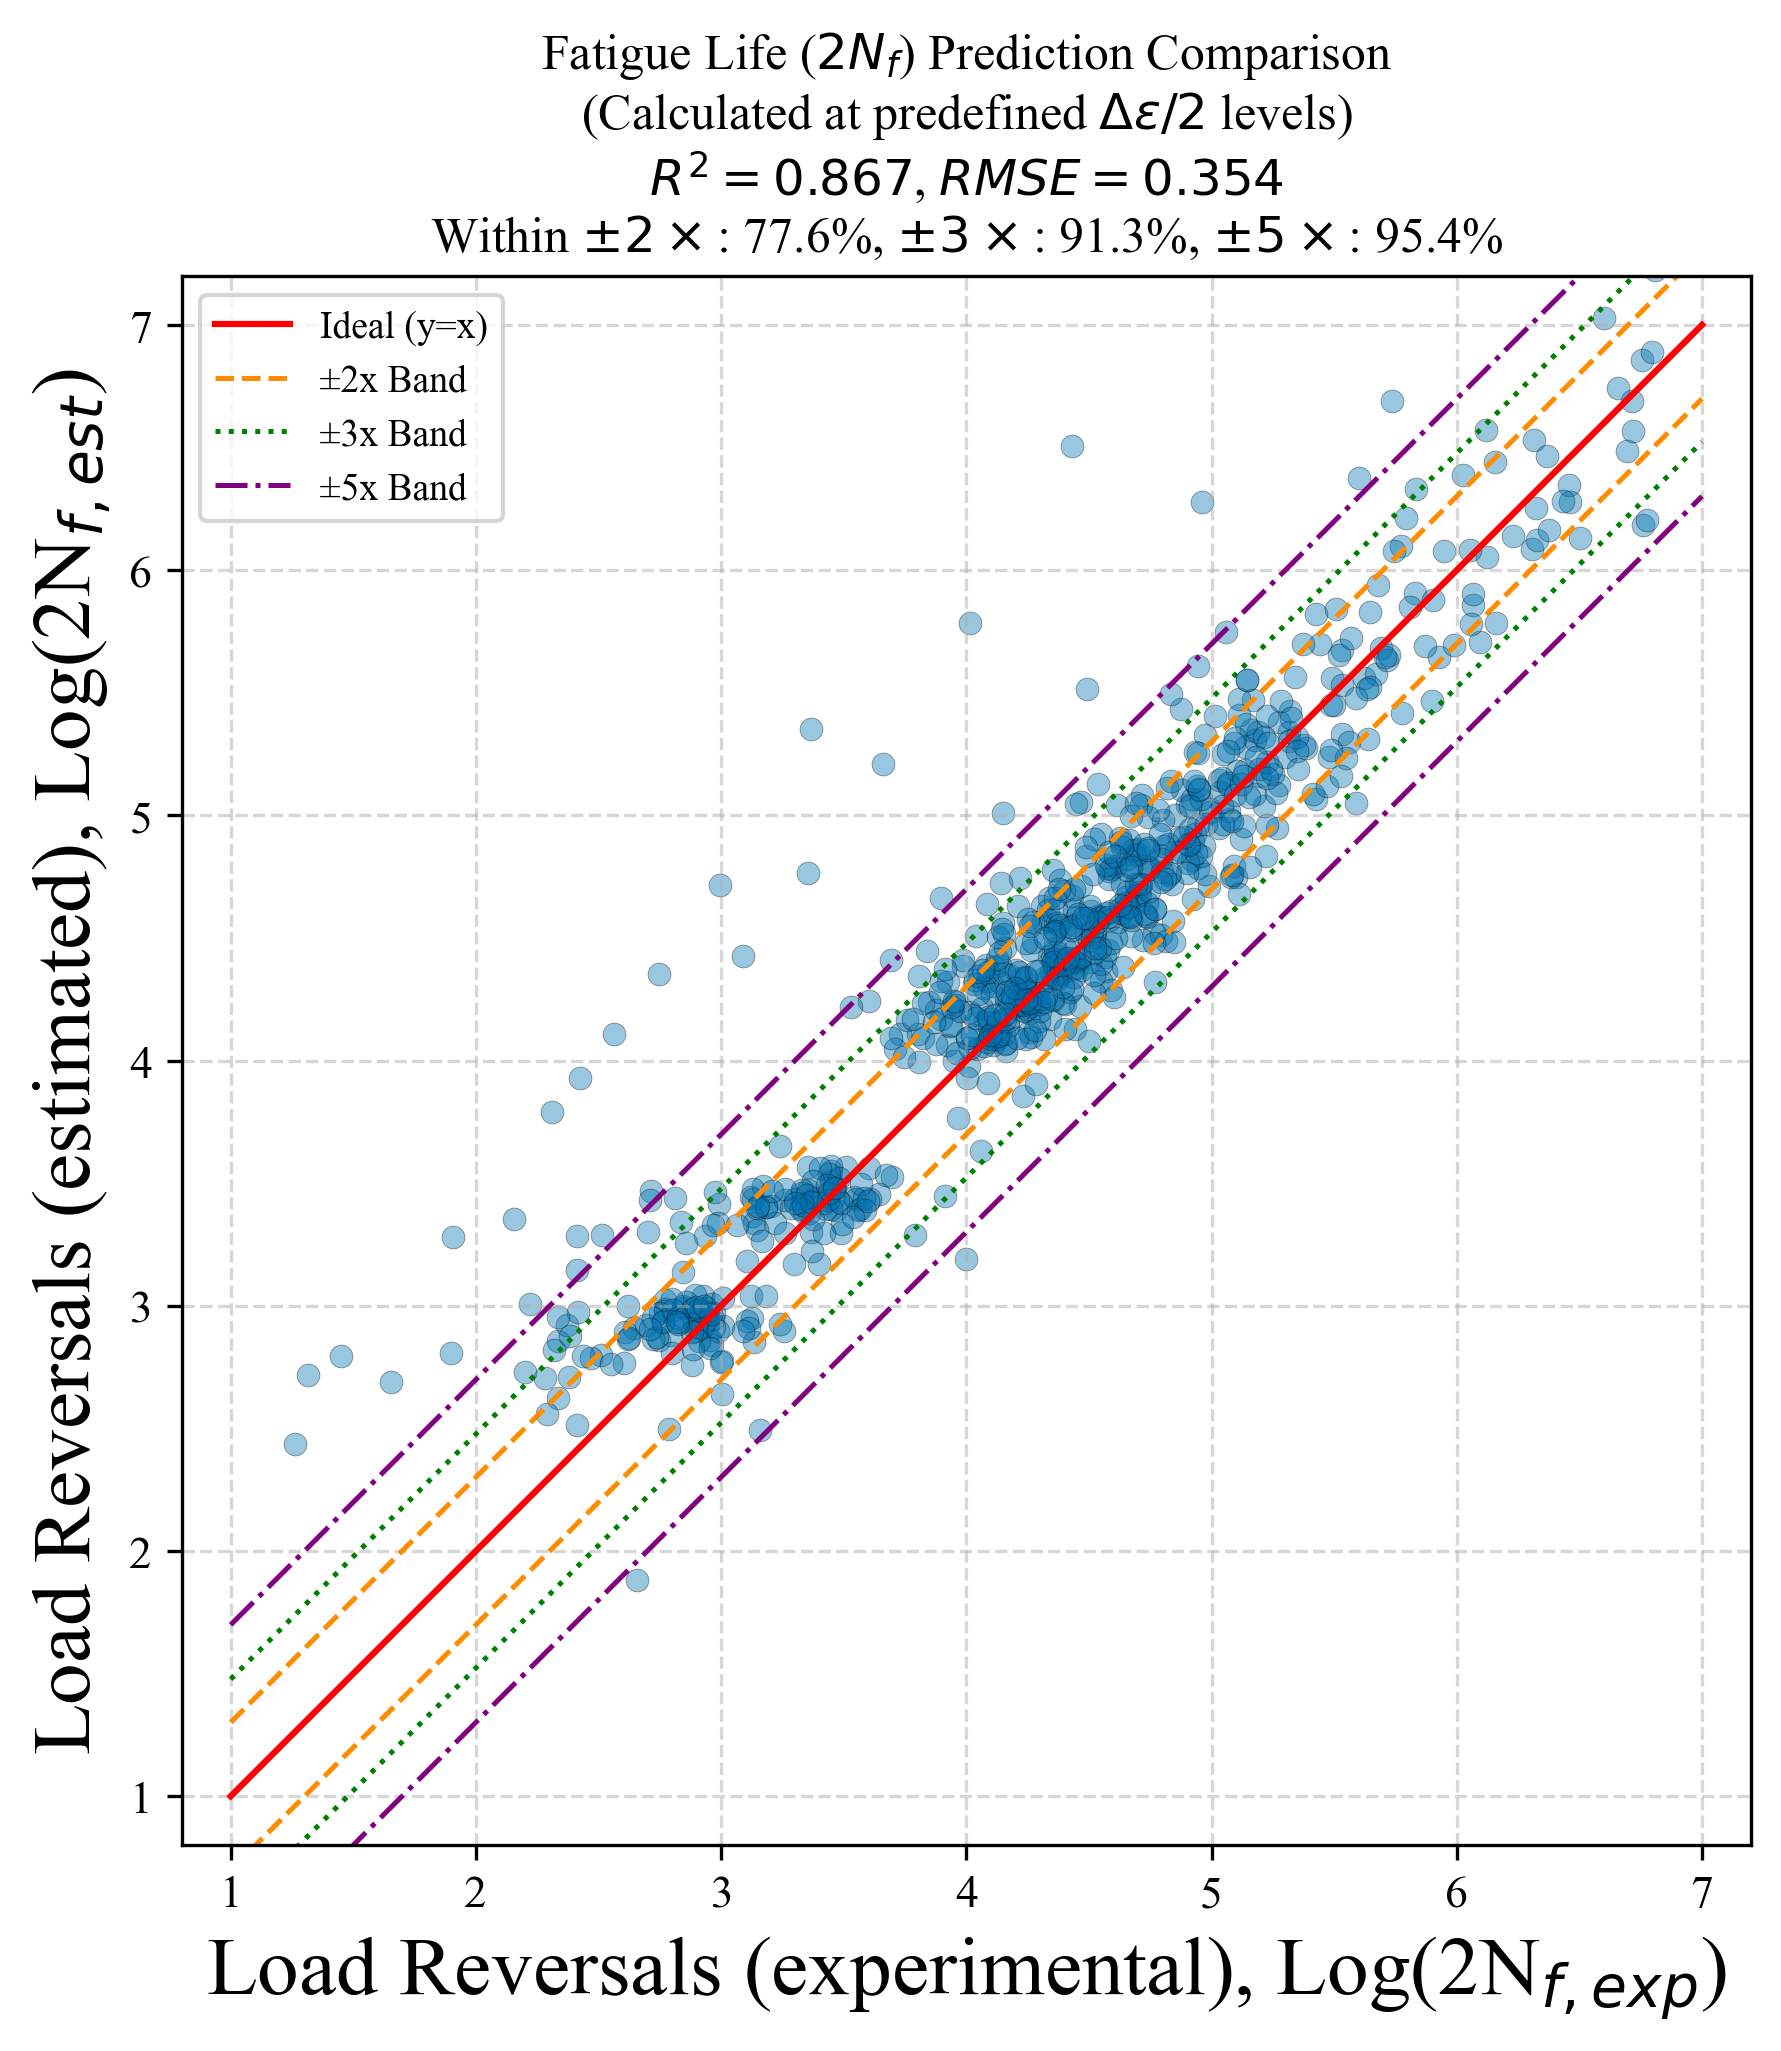

\nFatigue Life (log10(2Nf)) R2 Score: 0.8669
Fatigue Life (log10(2Nf)) RMSE: 0.3538
Percentage of predictions within ¬±1.3x scatter band: 41.42%
Percentage of predictions within ¬±2x scatter band: 77.59%
Percentage of predictions within ¬±3x scatter band: 91.35%
Percentage of predictions within ¬±5x scatter band: 95.41%


In [12]:
# Cell 4: 2Nf Í≥ÑÏÇ∞ Î∞è ÏÇ∞Ï†êÎèÑ ÌîåÎ°úÌåÖ (main0605.ipynb Cell 13 Î°úÏßÅ)
from sklearn.metrics import r2_score, mean_squared_error  # import Ï∂îÍ∞Ä (Cell 1Ïù¥ Ïã§ÌñâÎêòÏßÄ ÏïäÏùÄ Í≤ΩÏö∞Î•º ÎåÄÎπÑ)

if 'all_preds_orig_np' in locals() and 'all_targets_orig_np' in locals() and \
   'E_values_all_samples_np' in locals() and 'target_cols' in locals():

    predicted_params_all_samples = all_preds_orig_np
    true_params_all_samples = all_targets_orig_np
    
    try:
        # Ïù∏Îç±Ïä§Îäî solve_2Nf_from_strain Ìï®Ïàò ÎÇ¥ÏóêÏÑú target_colsÎ•º Í∏∞Î∞òÏúºÎ°ú Ï≤òÎ¶¨Îê®
        # Ïó¨Í∏∞ÏÑúÎäî Î≥ÑÎèÑÎ°ú spf_idx, b_idx Îì±ÏùÑ Ï†ïÏùòÌï† ÌïÑÏöî ÏóÜÏùå
        pass
    except ValueError as e:
        print(f"Ïò§Î•ò: target_cols Î¶¨Ïä§Ìä∏Ïóê ÌïÑÏöîÌïú ÌååÎùºÎØ∏ÌÑ∞ Ïù¥Î¶ÑÏù¥ ÏóÜÏäµÎãàÎã§: {e}")
        raise

    # Í∞Å ÏÉòÌîå Î∞è Í∞Å Î≥ÄÌòïÎ•† ÏßÑÌè≠ Î†àÎ≤®Ïóê ÎåÄÌï¥ 2Nf_exp Î∞è 2Nf_est Í≥ÑÏÇ∞
    twoNf_exp_collected = []
    twoNf_est_collected = []
    
    num_test_samples = len(true_params_all_samples)
    print(f"\\nCalculating 2Nf_exp and 2Nf_est for {num_test_samples} test samples using {len(defined_total_strain_amplitudes)} strain levels...")

    for i in range(num_test_samples):
        params_true_sample = true_params_all_samples[i, :]
        params_pred_sample = predicted_params_all_samples[i, :]
        E_val_sample_i = E_values_all_samples_np[i]

        if any(np.isnan(params_true_sample)) or any(np.isnan(params_pred_sample)) or np.isnan(E_val_sample_i):
            # print(f"Skipping sample {i} due to NaN values: True_params={params_true_sample}, Pred_params={params_pred_sample}, E={E_val_sample_i}")
            continue
            
        for strain_amplitude_level in defined_total_strain_amplitudes:
            twoNf_exp = solve_2Nf_from_strain(params_true_sample, E_val_sample_i, strain_amplitude_level)
            twoNf_est = solve_2Nf_from_strain(params_pred_sample, E_val_sample_i, strain_amplitude_level)

            if not np.isnan(twoNf_exp) and not np.isnan(twoNf_est) and \
               twoNf_exp > 0 and twoNf_est > 0: # Ensure positive life values
                # Filter for a reasonable range of life, e.g., 10 to 10^7 cycles (2Nf)
                if 10**1 <= twoNf_exp <= 10**7 : #and 10**1 <= twoNf_est <= 10**7: (est Î≤îÏúÑÎäî ÏùºÎã® Ï†úÏô∏)
                    twoNf_exp_collected.append(twoNf_exp)
                    twoNf_est_collected.append(twoNf_est)
                # else:
                    # print(f"Filtered out: exp={twoNf_exp:.1e}, est={twoNf_est:.1e} for strain {strain_amplitude_level}")
            # else:
                # print(f"NaN result: exp={twoNf_exp}, est={twoNf_est} for strain {strain_amplitude_level}")


    if not twoNf_exp_collected or not twoNf_est_collected:
        print("Error: No valid 2Nf data points collected. Check data or solve_2Nf_from_strain function.")
    else:
        log_2Nf_exp_final = np.log10(np.array(twoNf_exp_collected))
        log_2Nf_est_final = np.log10(np.array(twoNf_est_collected))
        print(f"Successfully calculated and filtered {len(log_2Nf_exp_final)} (2Nf_exp, 2Nf_est) pairs for plotting.")

        # ÏÇ∞Ï†êÎèÑ (Scatter Plot) ÏûëÏÑ±
        if len(log_2Nf_exp_final) > 1: # R2 score needs at least 2 points
            plt.figure(figsize=(8, 7), facecolor='none') # Î∞∞Í≤Ω Ìà¨Î™Ö
            
            r2_2Nf_final = r2_score(log_2Nf_exp_final, log_2Nf_est_final)
            rmse_2Nf_final = np.sqrt(mean_squared_error(log_2Nf_exp_final, log_2Nf_est_final))
            
            # Scatter band inclusion rate Í≥ÑÏÇ∞ (1.3x, 2x, 3x, 5x)
            # ÏõêÎ≥∏ Ïä§ÏºÄÏùºÏóêÏÑú ÎπÑÏú® Í≥ÑÏÇ∞ ÌõÑ Î°úÍ∑∏ Î≥ÄÌôòÎêú Í∞íÏóê Ï†ÅÏö©
            ratio_2Nf_final = np.array(twoNf_est_collected) / np.array(twoNf_exp_collected)
            
            inside_1_3x_2Nf_final = np.logical_and(ratio_2Nf_final >= 1/1.3, ratio_2Nf_final <= 1.3).mean() * 100
            inside_2x_2Nf_final = np.logical_and(ratio_2Nf_final >= 1/2, ratio_2Nf_final <= 2).mean() * 100
            inside_3x_2Nf_final = np.logical_and(ratio_2Nf_final >= 1/3, ratio_2Nf_final <= 3).mean() * 100
            inside_5x_2Nf_final = np.logical_and(ratio_2Nf_final >= 1/5, ratio_2Nf_final <= 5).mean() * 100
            
            plot_axis_min_log = 1.0 # min(log_2Nf_exp_final.min(), log_2Nf_est_final.min()) - 0.5
            plot_axis_max_log = 7.0 # max(log_2Nf_exp_final.max(), log_2Nf_est_final.max()) + 0.5
            line_vals_log = np.linspace(plot_axis_min_log, plot_axis_max_log, 100)

            scatter_color = palette[0] # Using the first color from the defined palette

            plt.scatter(log_2Nf_exp_final, log_2Nf_est_final, alpha=0.4, s=30, 
                        color=scatter_color, edgecolor='k', linewidth=0.2)
                        # label=f'$R^2 = {r2_2Nf_final:.3f}$') # R2Îäî Ï†úÎ™©Ïù¥ÎÇò ÌÖçÏä§Ìä∏Î°ú ÌëúÏãú
            
            plt.plot(line_vals_log, line_vals_log, 'r-', linewidth=1.5, label='Ideal (y=x)')
            
            # Scatter band ÌîåÎ°Ø (2x, 3x, 5x)
            log_factor_2 = np.log10(2.0)
            log_factor_3 = np.log10(3.0)
            log_factor_5 = np.log10(5.0)
            
            # 2x Band
            plt.plot(line_vals_log, line_vals_log + log_factor_2, color='darkorange', linestyle='--', linewidth=1.2, label='¬±2x Band')
            plt.plot(line_vals_log, line_vals_log - log_factor_2, color='darkorange', linestyle='--', linewidth=1.2)
            
            # 3x Band
            plt.plot(line_vals_log, line_vals_log + log_factor_3, color='green', linestyle=':', linewidth=1.2, label='¬±3x Band')
            plt.plot(line_vals_log, line_vals_log - log_factor_3, color='green', linestyle=':', linewidth=1.2)
            
            # 5x Band
            plt.plot(line_vals_log, line_vals_log + log_factor_5, color='purple', linestyle='-.', linewidth=1.2, label='¬±5x Band')
            plt.plot(line_vals_log, line_vals_log - log_factor_5, color='purple', linestyle='-.', linewidth=1.2)

            plt.xlabel('Load Reversals (experimental), Log(2N$_{f,exp}$)')
            plt.ylabel('Load Reversals (estimated), Log(2N$_{f,est}$)')
            
            title_text = (f'Fatigue Life ($2N_f$) Prediction Comparison\n'
                          f'(Calculated at predefined $\\Delta\\varepsilon/2$ levels)\n'
                          f'$R^2 = {r2_2Nf_final:.3f}$, $RMSE = {rmse_2Nf_final:.3f}$\n'
                          f'Within $\\pm 2\\times$: {inside_2x_2Nf_final:.1f}%, '
                          f'$\\pm 3\\times$: {inside_3x_2Nf_final:.1f}%, '
                          f'$\\pm 5\\times$: {inside_5x_2Nf_final:.1f}%')
            plt.title(title_text, fontsize=12) # Ï†úÎ™© Ìè∞Ìä∏ ÌÅ¨Í∏∞ Ï°∞Ï†ï
            
            plt.xlim(plot_axis_min_log - 0.2, plot_axis_max_log + 0.2)
            plt.ylim(plot_axis_min_log - 0.2, plot_axis_max_log + 0.2)
            
            tick_values = np.arange(int(np.floor(plot_axis_min_log)), int(np.ceil(plot_axis_max_log)) + 1, 1.0)
            plt.xticks(tick_values)
            plt.yticks(tick_values)
            
            plt.legend(frameon=True, loc='upper left', fontsize=9)
            plt.grid(True, linestyle='--', alpha=0.5)
            plt.gca().set_aspect('equal', adjustable='box')
            plt.gca().set_facecolor('none') # Í∑∏ÎûòÌîÑ Î∞∞Í≤Ω Ìà¨Î™Ö

            plt.tight_layout()
            #plt.savefig("FatigueLife_2Nf_comparison_standalone.pdf", bbox_inches='tight', transparent=True)
            plt.show()
            
            print(f"\\nFatigue Life (log10(2Nf)) R2 Score: {r2_2Nf_final:.4f}")
            print(f"Fatigue Life (log10(2Nf)) RMSE: {rmse_2Nf_final:.4f}")
            print(f"Percentage of predictions within ¬±1.3x scatter band: {inside_1_3x_2Nf_final:.2f}%")
            print(f"Percentage of predictions within ¬±2x scatter band: {inside_2x_2Nf_final:.2f}%")
            print(f"Percentage of predictions within ¬±3x scatter band: {inside_3x_2Nf_final:.2f}%")
            print(f"Percentage of predictions within ¬±5x scatter band: {inside_5x_2Nf_final:.2f}%")

        else:
            print("No valid 2Nf data points (or less than 2) to plot after all calculations and filtering.")
else:
    print("\\nÌïÑÏàò Î≥ÄÏàòÍ∞Ä Ï†ïÏùòÎêòÏßÄ ÏïäÏïÑ ÌîºÎ°ú ÏàòÎ™Ö(2Nf) ÎπÑÍµê ÌèâÍ∞ÄÎ•º Í±¥ÎÑàÎúÅÎãàÎã§. Îç∞Ïù¥ÌÑ∞ Î°úÎî© ÏÖÄÏùÑ ÌôïÏù∏ÌïòÏÑ∏Ïöî.")


In [13]:
# Cell 11: Îã®Ï°∞ Î¨ºÏÑ±Ïπò ÏòàÏ∏° R¬≤Ïù¥ ÌîºÎ°ú ÏàòÎ™Ö Î≥ÄÎèôÏÑ±Ïóê ÎØ∏ÏπòÎäî ÏòÅÌñ• Î∂ÑÏÑù
import torch
import torch.nn as nn

# --- FatiguePINN ÌÅ¥ÎûòÏä§ Ï†ïÏùò (FatiguePredictor0605.pyÏôÄ ÎèôÏùº) ---
class FatiguePINN(nn.Module):
    def __init__(self, input_dim, output_dim, hidden_dims=[128, 256, 128], dropout_p=0.1):
        super().__init__()
        self.input_dim = input_dim
        self.output_dim = output_dim
        self.dropout_p = dropout_p 

        layers = []
        last_dim = input_dim
        for i, hidden_dim in enumerate(hidden_dims):
            layers.append(nn.Linear(last_dim, hidden_dim))
            layers.append(nn.ReLU())
            if self.dropout_p > 0:
                layers.append(nn.Dropout(p=self.dropout_p))
            last_dim = hidden_dim
        
        layers.append(nn.Linear(last_dim, output_dim))
        self.network = nn.Sequential(*layers)

    def forward(self, x):
        return self.network(x)

# --- inverse_transform_targets Ìï®Ïàò Ï†ïÏùò ---
def inverse_transform_targets(y_scaled_data, scalers_y_dict, target_cols_list):
    if y_scaled_data.ndim == 1:
        y_scaled_data = y_scaled_data.reshape(1, -1)
        
    y_transformed_individually = np.zeros_like(y_scaled_data)
    for i, col_name in enumerate(target_cols_list):
        if col_name not in scalers_y_dict: 
            raise KeyError(f"Scaler for target '{col_name}' not found in scalers_y_dict.")
        y_transformed_individually[:, i] = scalers_y_dict[col_name].inverse_transform(y_scaled_data[:, i].reshape(-1, 1)).flatten()
    
    y_orig_scale = y_transformed_individually.copy()
    
    # epfÏóê ÎåÄÌïú expm1 Î≥ÄÌôò Ï†ÅÏö©
    if 'epf' in target_cols_list:
        epf_idx = target_cols_list.index('epf')
        y_orig_scale[:, epf_idx] = np.expm1(y_transformed_individually[:, epf_idx])
    
    if y_scaled_data.shape[0] == 1 and y_orig_scale.shape[0] == 1:
         return y_orig_scale.flatten()
    return y_orig_scale

# --- AI Î™®Îç∏ Î∞è Ïä§ÏºÄÏùºÎü¨ Î°úÎìú ---
def load_model_and_scalers():
    device = torch.device('cuda' if torch.cuda.is_available() else 'mps' if torch.backends.mps.is_available() else 'cpu')
    
    # Î™®Îç∏ Íµ¨Ï°∞ ÏÑ§Ï†ï (FatiguePredictor0605.pyÏôÄ ÎèôÏùº)
    model_hidden_dims = [192, 384, 352, 224]
    model_dropout_p = 0.35
    input_dim = 4 
    output_dim = 4 

    model = FatiguePINN(input_dim=input_dim, output_dim=output_dim, 
                        hidden_dims=model_hidden_dims, dropout_p=model_dropout_p)
    
    try:
        # Î™®Îç∏ Î°úÎìú
        map_location = 'cuda' if torch.cuda.is_available() else 'mps' if torch.backends.mps.is_available() else 'cpu'
        model.load_state_dict(torch.load('best_fatigue_pinn_model.pth', map_location=map_location))
        model.to(device)
        model.eval()
        
        # Ïä§ÏºÄÏùºÎü¨ Î°úÎìú
        scaler_X = joblib.load('scaler_X.pkl')
        data_y = joblib.load('scalers_y.pkl')
        
        if isinstance(data_y, dict) and 'scalers' in data_y and 'target_cols' in data_y:
            scalers_y_dict = data_y['scalers']
            target_cols_list = data_y['target_cols']
        else:
            raise ValueError("Unexpected format in scalers_y.pkl file.")
            
        print(f"AI model and scalers loaded successfully. Device: {device}")
        return model, scaler_X, scalers_y_dict, target_cols_list, device
    
    except FileNotFoundError as e:
        print(f"File not found: {e}")
        return None, None, None, None, None
    except Exception as e:
        print(f"Error loading model/scalers: {e}")
        return None, None, None, None, None

# --- Í∞úÏÑ†Îêú Ï°∞ÏÑ±-Î¨ºÏÑ±Ïπò Î≥ÄÌôò Î™®Îìà ÏÇ¨Ïö© ---
import composition_to_properties as ctp

# --- ÌîºÎ°ú ÌååÎùºÎØ∏ÌÑ∞ ÏòàÏ∏° Ìï®Ïàò ---
def predict_fatigue_params_from_monotonic(E_gpa, YS_mpa, TS_mpa, HB,
                                          ai_model, scaler_X_loaded,
                                          scalers_y_dict_loaded, target_cols_list_loaded,
                                          device_loaded):
    # HB Ï≤òÎ¶¨
    hb_processed = HB
    if HB is None or np.isnan(HB) or HB <= 0:
        if TS_mpa is not None and not np.isnan(TS_mpa) and TS_mpa > 0:
            hb_processed = 1.8 * TS_mpa + 105
        else:
            return None

    E_mpa = E_gpa * 1000
    features_np = np.array([[E_mpa, YS_mpa, TS_mpa, hb_processed]], dtype=np.float32)
    
    try:
        scaled_features_np = scaler_X_loaded.transform(features_np)
        scaled_features = torch.tensor(scaled_features_np, dtype=torch.float32).to(device_loaded)

        with torch.no_grad():
            predicted_params_scaled = ai_model(scaled_features)

        predicted_params_orig = inverse_transform_targets(
            predicted_params_scaled.cpu().numpy(),
            scalers_y_dict_loaded,
            target_cols_list_loaded
        )
        
        params_dict = dict(zip(target_cols_list_loaded, predicted_params_orig))
        
        return [params_dict.get('spf_MPa'), params_dict.get('b'),
                params_dict.get('epf'), params_dict.get('c')]
    except Exception as e:
        print(f"Error predicting fatigue parameters: {e}")
        return None

# --- R¬≤Ïóê Îî∞Î•∏ Ïò§Ï∞®Ïú® ÏÑ§Ï†ï Ìï®Ïàò ---
def get_error_percentage_from_r2(r_squared):
    if r_squared >= 0.9: return 5    # R¬≤ >= 0.9 -> ¬±5% error
    if r_squared >= 0.7: return 10   # R¬≤ 0.7~0.9 -> ¬±10% error
    if r_squared >= 0.5: return 20   # R¬≤ 0.5~0.7 -> ¬±20% error
    if r_squared >= 0.3: return 30   # R¬≤ 0.3~0.5 -> ¬±30% error
    return 40                        # R¬≤ < 0.3 -> ¬±40% error

print("Monotonic property prediction R-squared impact analysis module loaded successfully.")


Monotonic property prediction R-squared impact analysis module loaded successfully.


In [15]:
# Cell 12: Îã®Ï°∞ Î¨ºÏÑ±Ïπò ÏòàÏ∏° R¬≤ ÏòÅÌñ• ÏãúÎÆ¨Î†àÏù¥ÏÖò Ïã§Ìñâ
pd = pd if 'pd' in locals() else __import__('pandas')

# --- ÏãúÎÆ¨Î†àÏù¥ÏÖò ÏÑ§Ï†ï ---
# 1. Í∏∞Ï§Ä(Nominal) Ï°∞ÏÑ± Î∞è Î¨ºÏÑ±Ïπò ÏÑ§Ï†ï
SAMPLE_COMPOSITION = {
    'C': 0.25, 'Mn': 0.8, 'Si': 0.3, 'Cr': 0.5, 'Mo': 0.1, 
    'P': 0.015, 'S': 0.015, 'Ni': 0.0, 'V': 0.0, 'Nb': 0.0, 
    'Ti': 0.0, 'Al': 0.0, 'N': 0.0, 'Cu': 0.0, 'B': 0.0
}

# Í∞úÏÑ†Îêú Ï°∞ÏÑ±-Î¨ºÏÑ±Ïπò Î™®Îç∏Î°ú Í∏∞Ï§Ä Î¨ºÏÑ±Ïπò Í≥ÑÏÇ∞
nominal_props = ctp.calculate_monotonic_properties(SAMPLE_COMPOSITION)
NOMINAL_E_GPA = nominal_props.get('E_gpa', 200.0)
NOMINAL_YS_MPA = nominal_props.get('YS_mpa', 500.0)
NOMINAL_TS_MPA = nominal_props.get('TS_mpa', 700.0)
NOMINAL_HB = nominal_props.get('HB', 200.0)
POISSON_RATIO = 0.3

print(f"Reference composition: {SAMPLE_COMPOSITION}")
print(f"Reference monotonic properties:")
print(f"  E: {NOMINAL_E_GPA:.1f} GPa")
print(f"  YS: {NOMINAL_YS_MPA:.1f} MPa") 
print(f"  TS: {NOMINAL_TS_MPA:.1f} MPa")
print(f"  HB: {NOMINAL_HB:.1f}")

# 2. ÏãúÎÆ¨Î†àÏù¥ÏÖò ÌååÎùºÎØ∏ÌÑ∞
R_SQUARED_LEVELS_TO_TEST = [0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.99]
N_SAMPLES_PER_R2 = 100  # Í∞Å R¬≤ Î†àÎ≤®Îãπ ÏÉòÌîå Ïàò
TARGET_STRAIN_AMPLITUDE = 0.005  # Î∂ÑÏÑùÌï† Î≥ÄÌòïÎ•† ÏßÑÌè≠

# 3. AI Î™®Îç∏ Î∞è Ïä§ÏºÄÏùºÎü¨ Î°úÎìú
model, scaler_X, scalers_y_dict, target_cols_list, device = load_model_and_scalers()

if model is None:
    print("ERROR: Cannot load AI model. Simulation cannot proceed.")
    print("Please ensure the following files exist in the current directory:")
    print("  - best_fatigue_pinn_model.pth")
    print("  - scaler_X.pkl") 
    print("  - scalers_y.pkl")
else:
    print("AI model loaded successfully.")
    print(f"Target columns: {target_cols_list}")
    
    # --- ÏãúÎÆ¨Î†àÏù¥ÏÖò Ïã§Ìñâ ---
    all_results = []
    np.random.seed(42)  # Ïû¨ÌòÑ Í∞ÄÎä•Ìïú Í≤∞Í≥ºÎ•º ÏúÑÌïú ÏãúÎìú ÏÑ§Ï†ï
    
    for r2_value in R_SQUARED_LEVELS_TO_TEST:
        error_percent = get_error_percentage_from_r2(r2_value)
        print(f"\nSimulating R¬≤ = {r2_value:.2f} (Monotonic property error: ¬±{error_percent}%)")
        
        current_2Nf_values_for_r2 = []
        valid_predictions = 0
        
        for sample_idx in range(N_SAMPLES_PER_R2):
            # Í∞Å Î¨ºÏÑ±ÏπòÏóê Ïò§Ï∞® Ï†ÅÏö© (ÎèÖÎ¶ΩÏ†ÅÏúºÎ°ú)
            perturbed_E_gpa = NOMINAL_E_GPA * (1 + np.random.uniform(-error_percent, error_percent) / 100.0)
            perturbed_YS_mpa = NOMINAL_YS_MPA * (1 + np.random.uniform(-error_percent, error_percent) / 100.0)
            perturbed_TS_mpa = NOMINAL_TS_MPA * (1 + np.random.uniform(-error_percent, error_percent) / 100.0)
            perturbed_HB = NOMINAL_HB * (1 + np.random.uniform(-error_percent, error_percent) / 100.0)
            
            # Î¨ºÎ¶¨Ï†Å Ï†úÏïΩ Ï°∞Í±¥: YS ‚â§ TS Ïú†ÏßÄ
            if perturbed_YS_mpa > perturbed_TS_mpa:
                perturbed_YS_mpa = perturbed_TS_mpa * np.random.uniform(0.85, 0.98)
            
            # ÏùåÏàò Í∞í Î∞©ÏßÄ
            perturbed_E_gpa = max(perturbed_E_gpa, 50.0)
            perturbed_YS_mpa = max(perturbed_YS_mpa, 100.0)
            perturbed_TS_mpa = max(perturbed_TS_mpa, 200.0)
            perturbed_HB = max(perturbed_HB, 50.0)
            
            # AI Î™®Îç∏Î°ú ÌîºÎ°ú ÌååÎùºÎØ∏ÌÑ∞ ÏòàÏ∏°
            fatigue_params_predicted = predict_fatigue_params_from_monotonic(
                perturbed_E_gpa, perturbed_YS_mpa, perturbed_TS_mpa, perturbed_HB,
                model, scaler_X, scalers_y_dict, target_cols_list, device
            )
            
            if fatigue_params_predicted and not any(p is None or np.isnan(p) for p in fatigue_params_predicted):
                # solve_2Nf_from_strain Ìï®Ïàò ÏÇ¨Ïö© (Cell 3ÏóêÏÑú Ï†ïÏùòÎê®)
                two_Nf = solve_2Nf_from_strain(
                    fatigue_params_predicted,
                    perturbed_E_gpa * 1000,  # EÎäî MPaÎ°ú Ï†ÑÎã¨
                    TARGET_STRAIN_AMPLITUDE
                )
                
                if not np.isnan(two_Nf) and 1e2 <= two_Nf <= 1e7:  # Ïú†Ìö® Î≤îÏúÑ ÌïÑÌÑ∞ÎßÅ
                    current_2Nf_values_for_r2.append(two_Nf)
                    valid_predictions += 1
        
        if current_2Nf_values_for_r2:
            log10_2Nf_values = np.log10(np.array(current_2Nf_values_for_r2))
            all_results.append({
                'r_squared': r2_value,
                'error_percent_monotonic': error_percent,
                'log10_2Nf_values': log10_2Nf_values,
                'mean_log10_2Nf': np.mean(log10_2Nf_values),
                'std_log10_2Nf': np.std(log10_2Nf_values),
                'valid_samples': len(current_2Nf_values_for_r2)
            })
            print(f"  Valid predictions: {valid_predictions}/{N_SAMPLES_PER_R2} (Mean log‚ÇÅ‚ÇÄ(2Nf): {np.mean(log10_2Nf_values):.2f} ¬± {np.std(log10_2Nf_values):.2f})")
        else:
            print(f"  No valid 2Nf values obtained.")
    
    print(f"\nSimulation completed. Results generated for {len(all_results)} R¬≤ levels.")


Reference composition: {'C': 0.25, 'Mn': 0.8, 'Si': 0.3, 'Cr': 0.5, 'Mo': 0.1, 'P': 0.015, 'S': 0.015, 'Ni': 0.0, 'V': 0.0, 'Nb': 0.0, 'Ti': 0.0, 'Al': 0.0, 'N': 0.0, 'Cu': 0.0, 'B': 0.0}
Reference monotonic properties:
  E: 205.1 GPa
  YS: 1203.6 MPa
  TS: 1265.3 MPa
  HB: 538.8
AI model and scalers loaded successfully. Device: mps
AI model loaded successfully.
Target columns: ['spf_MPa', 'b', 'epf', 'c']

Simulating R¬≤ = 0.20 (Monotonic property error: ¬±40%)
  Valid predictions: 100/100 (Mean log‚ÇÅ‚ÇÄ(2Nf): 4.48 ¬± 0.50)

Simulating R¬≤ = 0.30 (Monotonic property error: ¬±30%)
  Valid predictions: 100/100 (Mean log‚ÇÅ‚ÇÄ(2Nf): 4.40 ¬± 0.34)

Simulating R¬≤ = 0.40 (Monotonic property error: ¬±30%)
  Valid predictions: 100/100 (Mean log‚ÇÅ‚ÇÄ(2Nf): 4.36 ¬± 0.35)

Simulating R¬≤ = 0.50 (Monotonic property error: ¬±20%)
  Valid predictions: 100/100 (Mean log‚ÇÅ‚ÇÄ(2Nf): 4.34 ¬± 0.14)

Simulating R¬≤ = 0.60 (Monotonic property error: ¬±20%)
  Valid predictions: 100/100 (Mean log‚ÇÅ‚ÇÄ(

Simulation Results Summary:
  R¬≤ Error (%)  Valid Samples Mean log‚ÇÅ‚ÇÄ(2Nf) Std Dev CV (%)
0.20       ¬±40            100           4.485   0.505   11.3
0.30       ¬±30            100           4.398   0.342    7.8
0.40       ¬±30            100           4.361   0.350    8.0
0.50       ¬±20            100           4.343   0.144    3.3
0.60       ¬±20            100           4.340   0.151    3.5
0.70       ¬±10            100           4.334   0.040    0.9
0.80       ¬±10            100           4.329   0.044    1.0
0.90        ¬±5            100           4.328   0.020    0.5
0.99        ¬±5            100           4.325   0.020    0.5


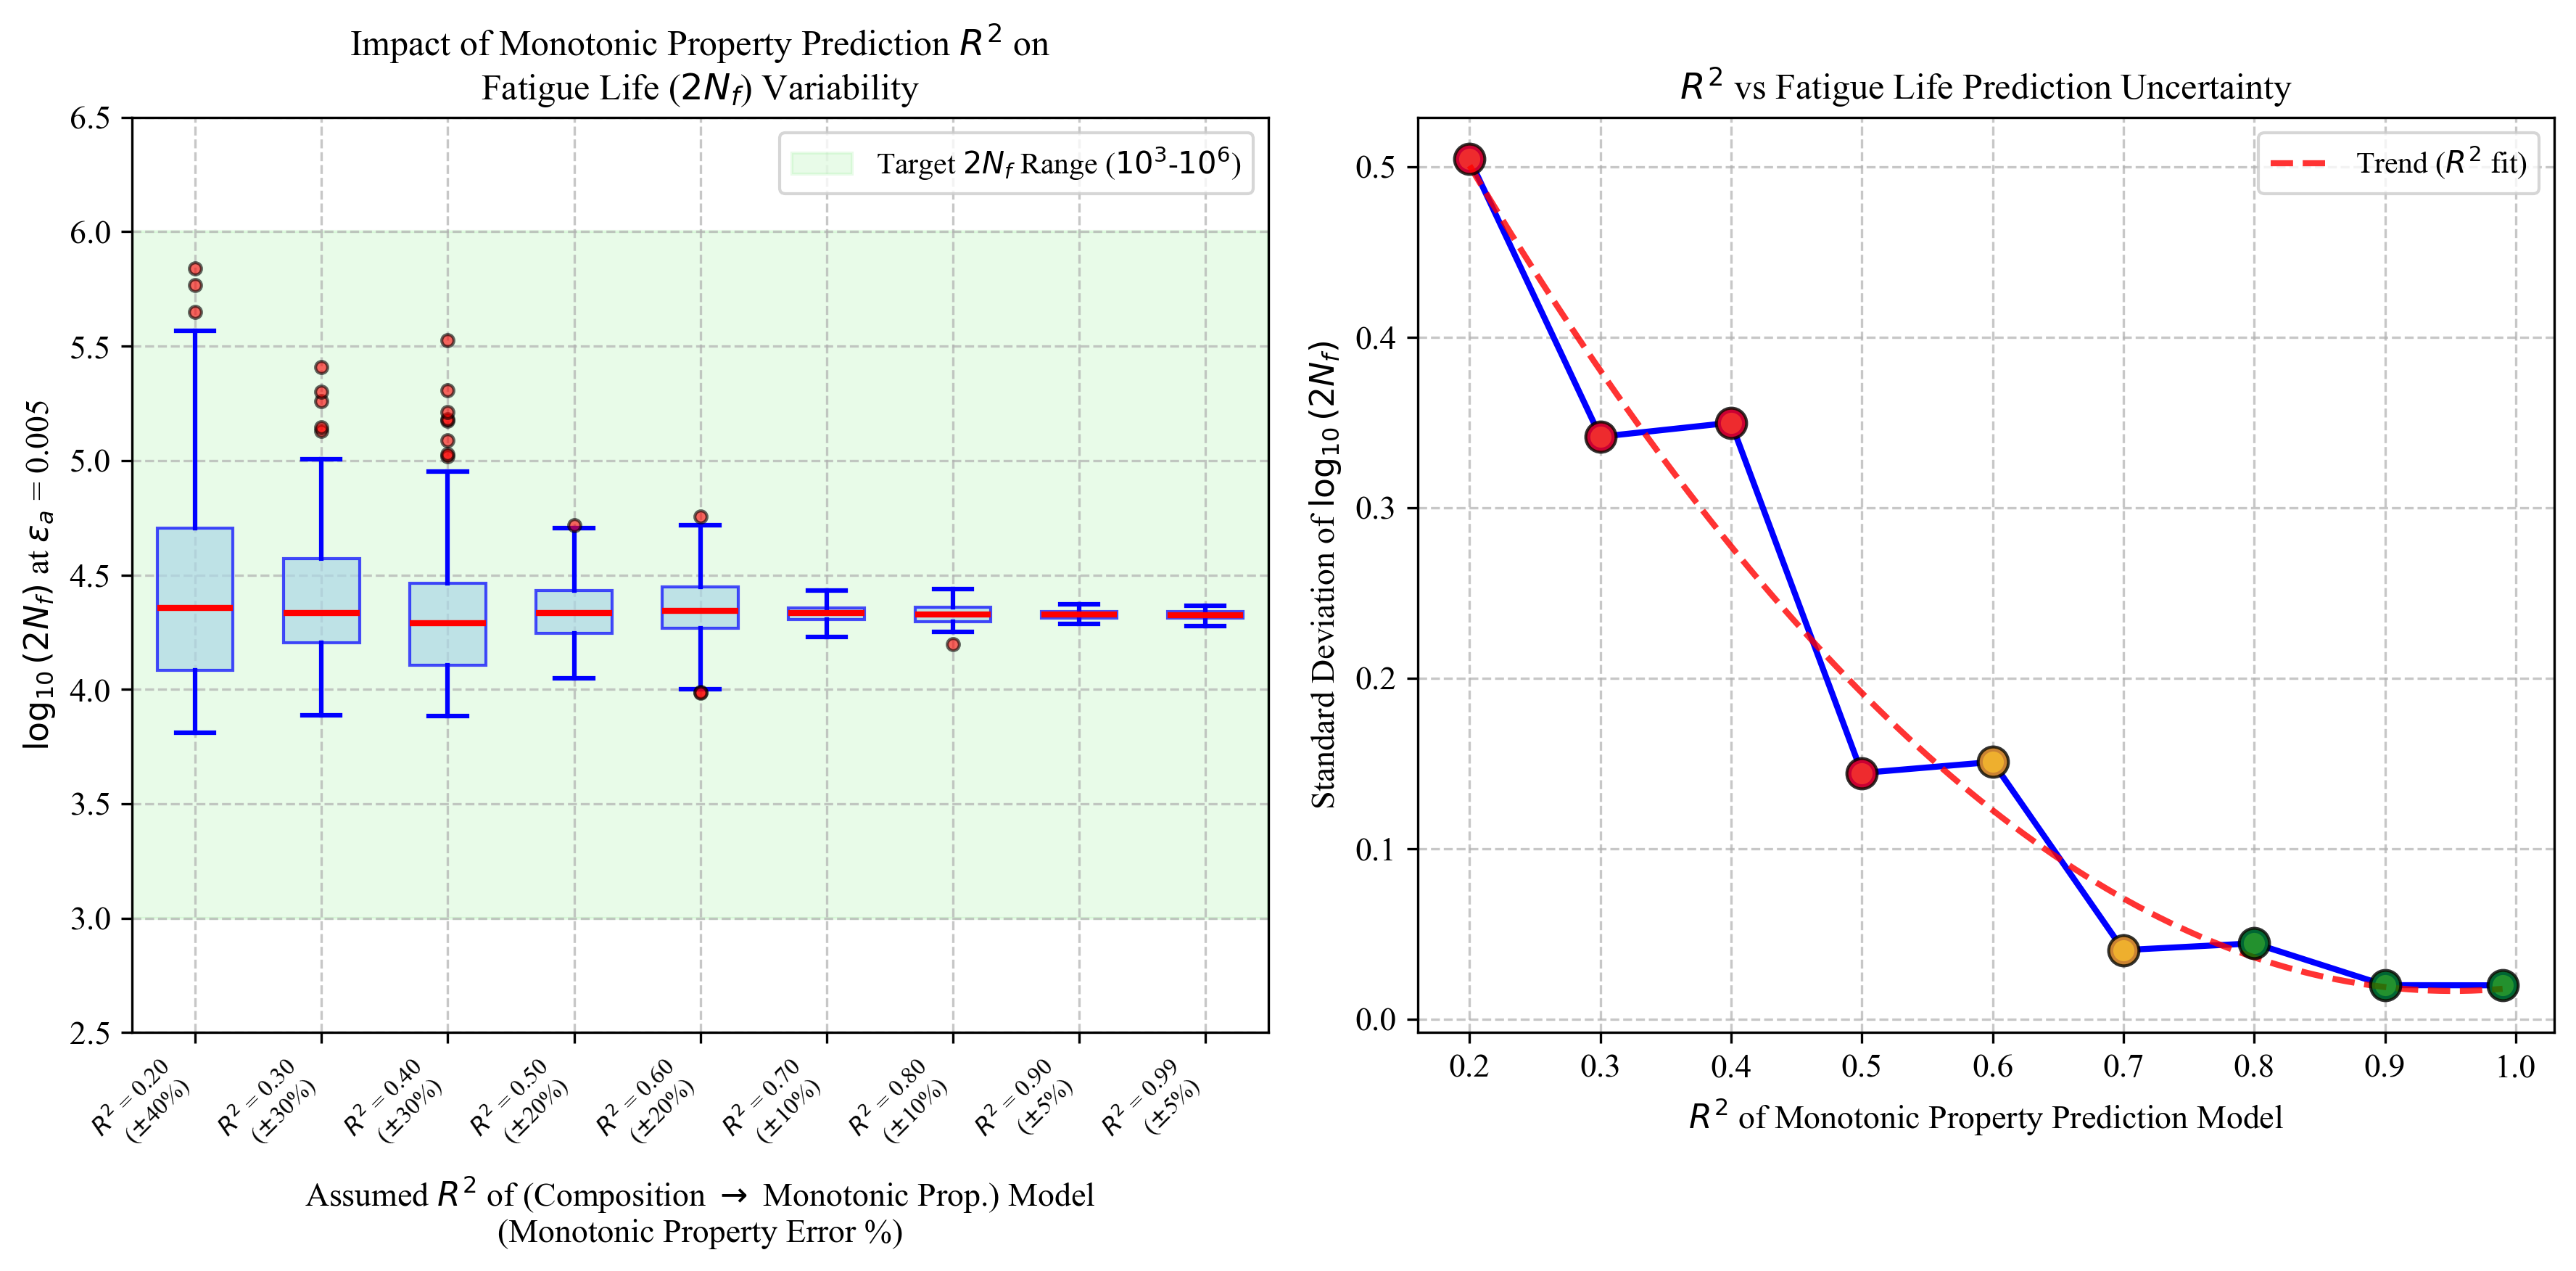


Key Analysis Results:
1. Highest R¬≤ (0.99): Standard deviation = 0.020
2. Lowest R¬≤ (0.20): Standard deviation = 0.505
3. Uncertainty increase ratio: 25.5√ó
4. 95% confidence interval range (¬±2œÉ):
   - Highest R¬≤: ¬±0.04 log‚ÇÅ‚ÇÄ(2Nf) ‚âà 1.1√ó variation
   - Lowest R¬≤: ¬±1.01 log‚ÇÅ‚ÇÄ(2Nf) ‚âà 10.2√ó variation


In [16]:
# Cell 13: Í≤∞Í≥º ÏãúÍ∞ÅÌôî Î∞è Î∂ÑÏÑù
if 'all_results' in locals() and all_results:
    # --- Í≤∞Í≥º ÏöîÏïΩ ÌÖåÏù¥Î∏î ÏÉùÏÑ± ---
    summary_data = []
    for result in all_results:
        summary_data.append({
            'R¬≤': result['r_squared'],
            'Error (%)': f"¬±{result['error_percent_monotonic']}",
            'Valid Samples': result['valid_samples'],
            'Mean log‚ÇÅ‚ÇÄ(2Nf)': f"{result['mean_log10_2Nf']:.3f}",
            'Std Dev': f"{result['std_log10_2Nf']:.3f}",
            'CV (%)': f"{(result['std_log10_2Nf']/result['mean_log10_2Nf']*100):.1f}"
        })
    
    summary_df = pd.DataFrame(summary_data)
    print("Simulation Results Summary:")
    print(summary_df.to_string(index=False))
    
    # --- Î∞ïÏä§ÌîåÎ°Ø ÏãúÍ∞ÅÌôî ---
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    
    # ÏÑúÎ∏åÌîåÎ°Ø 1: Î∞ïÏä§ÌîåÎ°Ø
    plot_data = [result['log10_2Nf_values'] for result in all_results if len(result['log10_2Nf_values']) > 0]
    valid_r2_values = [result['r_squared'] for result in all_results if len(result['log10_2Nf_values']) > 0]
    valid_error_percents = [result['error_percent_monotonic'] for result in all_results if len(result['log10_2Nf_values']) > 0]
    
    positions = np.arange(len(plot_data))
    
    if plot_data:
        box_plot = ax1.boxplot(plot_data, positions=positions, widths=0.6, patch_artist=True,
                              medianprops={'color': 'red', 'linewidth': 2},
                              boxprops={'facecolor': 'lightblue', 'edgecolor': 'blue', 'alpha': 0.7},
                              whiskerprops={'color': 'blue', 'linewidth': 1.5},
                              capprops={'color': 'blue', 'linewidth': 1.5},
                              flierprops={'marker': 'o', 'markerfacecolor': 'red', 'markersize': 4, 'alpha': 0.6})
        
        # XÏ∂ï Î†àÏù¥Î∏î ÏÑ§Ï†ï
        x_labels = [f"$R^2$ = {r2:.2f}\n($\\pm${err}%)" for r2, err in zip(valid_r2_values, valid_error_percents)]
        ax1.set_xticks(positions)
        ax1.set_xticklabels(x_labels, fontsize=8, rotation=45, ha='right')
        ax1.set_xlabel('Assumed $R^2$ of (Composition $\\rightarrow$ Monotonic Prop.) Model\n(Monotonic Property Error %)', fontsize=11)
        ax1.set_ylabel(f'$\\log_{{10}}(2N_f)$ at $\\varepsilon_a$ = {TARGET_STRAIN_AMPLITUDE}', fontsize=11)
        ax1.set_title('Impact of Monotonic Property Prediction $R^2$ on\nFatigue Life ($2N_f$) Variability', fontsize=12)
        ax1.grid(True, linestyle='--', alpha=0.7)
        
        # 2Nf = 10¬≥ ~ 10‚Å∂ Î≤îÏúÑ Í∞ïÏ°∞
        ax1.axhspan(3, 6, color='lightgreen', alpha=0.2, label='Target $2N_f$ Range ($10^3$-$10^6$)')
        ax1.set_ylim(2.5, 6.5)
        ax1.legend(loc='upper right', fontsize=10)
        
        # ÏÑúÎ∏åÌîåÎ°Ø 2: ÌëúÏ§ÄÌé∏Ï∞® vs R¬≤ Í¥ÄÍ≥Ñ
        std_values = [result['std_log10_2Nf'] for result in all_results if len(result['log10_2Nf_values']) > 0]
        
        ax2.plot(valid_r2_values, std_values, 'bo-', linewidth=2, markersize=8, markerfacecolor='lightblue')
        ax2.set_xlabel('$R^2$ of Monotonic Property Prediction Model', fontsize=11)
        ax2.set_ylabel('Standard Deviation of $\\log_{10}(2N_f)$', fontsize=11)
        ax2.set_title('$R^2$ vs Fatigue Life Prediction Uncertainty', fontsize=12)
        ax2.grid(True, linestyle='--', alpha=0.7)
        
        # Ï∂îÏÑ∏ÏÑ† Ï∂îÍ∞Ä
        z = np.polyfit(valid_r2_values, std_values, 2)  # 2Ï∞® Îã§Ìï≠Ïãù ÌîºÌåÖ
        p = np.poly1d(z)
        x_smooth = np.linspace(min(valid_r2_values), max(valid_r2_values), 100)
        ax2.plot(x_smooth, p(x_smooth), 'r--', alpha=0.8, linewidth=2, label='Trend ($R^2$ fit)')
        ax2.legend(fontsize=10)
        
        # R¬≤ Î≤îÏúÑÎ≥Ñ ÏÉâÏÉÅ Íµ¨Î∂Ñ
        for i, (r2, std_val) in enumerate(zip(valid_r2_values, std_values)):
            if r2 >= 0.8:
                color = 'green'
            elif r2 >= 0.6:
                color = 'orange'
            else:
                color = 'red'
            ax2.scatter(r2, std_val, c=color, s=100, alpha=0.8, edgecolors='black', zorder=5)
    
    plt.tight_layout()
    plt.show()
    
    # --- Ï£ºÏöî Ïù∏ÏÇ¨Ïù¥Ìä∏ Ï∂úÎ†• ---
    if len(all_results) >= 2:
        best_r2_result = max(all_results, key=lambda x: x['r_squared'])
        worst_r2_result = min(all_results, key=lambda x: x['r_squared'])
        
        print(f"\nKey Analysis Results:")
        print(f"1. Highest R¬≤ ({best_r2_result['r_squared']:.2f}): Standard deviation = {best_r2_result['std_log10_2Nf']:.3f}")
        print(f"2. Lowest R¬≤ ({worst_r2_result['r_squared']:.2f}): Standard deviation = {worst_r2_result['std_log10_2Nf']:.3f}")
        
        uncertainty_ratio = worst_r2_result['std_log10_2Nf'] / best_r2_result['std_log10_2Nf']
        print(f"3. Uncertainty increase ratio: {uncertainty_ratio:.1f}√ó")
        
        # 2Nf Î≤îÏúÑ Í≥ÑÏÇ∞ (¬±2œÉ Í∏∞Ï§Ä)
        best_2sigma_range = 2 * best_r2_result['std_log10_2Nf']
        worst_2sigma_range = 2 * worst_r2_result['std_log10_2Nf']
        
        print(f"4. 95% confidence interval range (¬±2œÉ):")
        print(f"   - Highest R¬≤: ¬±{best_2sigma_range:.2f} log‚ÇÅ‚ÇÄ(2Nf) ‚âà {10**best_2sigma_range:.1f}√ó variation")
        print(f"   - Lowest R¬≤: ¬±{worst_2sigma_range:.2f} log‚ÇÅ‚ÇÄ(2Nf) ‚âà {10**worst_2sigma_range:.1f}√ó variation")
    
    # --- Í≤∞Í≥º Îç∞Ïù¥ÌÑ∞ Ï†ÄÏû• ÏòµÏÖò ---
    if len(all_results) > 0:
        # Î™®Îì† Í≤∞Í≥ºÎ•º ÌïòÎÇòÏùò DataFrameÏúºÎ°ú ÌÜµÌï©
        all_data_for_export = []
        for result in all_results:
            for log_2nf in result['log10_2Nf_values']:
                all_data_for_export.append({
                    'R_squared': result['r_squared'],
                    'Error_percent': result['error_percent_monotonic'],
                    'Log10_2Nf': log_2nf,
                    'Target_strain_amplitude': TARGET_STRAIN_AMPLITUDE
                })
        
        export_df = pd.DataFrame(all_data_for_export)
        
       
else:
    print("ERROR: No simulation results available for visualization.")
    print("Please run Cell 6 first to complete the simulation.")


In [17]:
# Cell 21: TS Îç∞Ïù¥ÌÑ∞ Í∑∏Î£πÎ≥Ñ Î∂ÑÏÑù Î∞è ÏãúÍ∞ÅÌôî
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ÌååÏùº Î°úÎìú
try:
    df = pd.read_excel('TrainSet0507_Composition.xlsx')
    print(f"Îç∞Ïù¥ÌÑ∞ Î°úÎìú ÏôÑÎ£å: {df.shape[0]}Í∞ú Ìñâ, {df.shape[1]}Í∞ú Ïó¥")
    print(f"TS Ïó¥ ÌÜµÍ≥Ñ:")
    print(df['TS'].describe())
    
    # TS Ïó¥ÏóêÏÑú Í≤∞Ï∏°Í∞í ÌôïÏù∏ Î∞è Ï†úÍ±∞
    df_clean = df.dropna(subset=['TS'])
    print(f"\nÍ≤∞Ï∏°Í∞í Ï†úÍ±∞ ÌõÑ: {df_clean.shape[0]}Í∞ú Ìñâ")
    
    # TS Îç∞Ïù¥ÌÑ∞Î•º 3Í∞ú Í∑∏Î£πÏúºÎ°ú Î∂ÑÎ•ò
    def classify_ts_group(ts_value):
        if ts_value < 700:
            return 'Group 1: TS < 700'
        elif 700 <= ts_value < 1000:
            return 'Group 2: 700 ‚â§ TS < 1000'
        else:
            return 'Group 3: TS ‚â• 1000'
    
    df_clean['TS_Group'] = df_clean['TS'].apply(classify_ts_group)
    
    # Í∑∏Î£πÎ≥Ñ Îç∞Ïù¥ÌÑ∞ Í∞úÏàò ÌôïÏù∏
    group_counts = df_clean['TS_Group'].value_counts()
    print(f"\nÍ∑∏Î£πÎ≥Ñ Îç∞Ïù¥ÌÑ∞ Í∞úÏàò:")
    for group, count in group_counts.items():
        print(f"  {group}: {count}Í∞ú")
    
    # ÏãúÍ∞ÅÌôî
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # 1. ÌûàÏä§ÌÜ†Í∑∏Îû® - Ï†ÑÏ≤¥ TS Î∂ÑÌè¨
    axes[0, 0].hist(df_clean['TS'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
    axes[0, 0].axvline(x=700, color='red', linestyle='--', linewidth=2, label='TS = 700')
    axes[0, 0].axvline(x=1000, color='red', linestyle='--', linewidth=2, label='TS = 1000')
    axes[0, 0].set_xlabel('Tensile Strength (TS) [MPa]')
    axes[0, 0].set_ylabel('Frequency')
    axes[0, 0].set_title('Overall Distribution of TS Values')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)
    
    # 2. Î∞ïÏä§ÌîåÎ°Ø - Í∑∏Î£πÎ≥Ñ TS Î∂ÑÌè¨
    group_data = [df_clean[df_clean['TS_Group'] == group]['TS'].values 
                  for group in ['Group 1: TS < 700', 'Group 2: 700 ‚â§ TS < 1000', 'Group 3: TS ‚â• 1000']]
    group_labels = ['Group 1\n(TS < 700)', 'Group 2\n(700 ‚â§ TS < 1000)', 'Group 3\n(TS ‚â• 1000)']
    
    bp = axes[0, 1].boxplot(group_data, labels=group_labels, patch_artist=True)
    colors = ['lightcoral', 'lightgreen', 'lightblue']
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
    axes[0, 1].set_ylabel('Tensile Strength (TS) [MPa]')
    axes[0, 1].set_title('TS Distribution by Groups')
    axes[0, 1].grid(True, alpha=0.3)
    
    # 3. ÌååÏù¥ Ï∞®Ìä∏ - Í∑∏Î£πÎ≥Ñ ÎπÑÏú®
    group_counts_ordered = [
        len(df_clean[df_clean['TS_Group'] == 'Group 1: TS < 700']),
        len(df_clean[df_clean['TS_Group'] == 'Group 2: 700 ‚â§ TS < 1000']),
        len(df_clean[df_clean['TS_Group'] == 'Group 3: TS ‚â• 1000'])
    ]
    
    axes[1, 0].pie(group_counts_ordered, labels=group_labels, colors=colors, autopct='%1.1f%%', startangle=90)
    axes[1, 0].set_title('Distribution of Samples by TS Groups')
    
    # 4. Î∞î Ï∞®Ìä∏ - Í∑∏Î£πÎ≥Ñ ÌÜµÍ≥Ñ
    group_stats = []
    for i, group_name in enumerate(['Group 1: TS < 700', 'Group 2: 700 ‚â§ TS < 1000', 'Group 3: TS ‚â• 1000']):
        group_data_stats = df_clean[df_clean['TS_Group'] == group_name]['TS']
        group_stats.append({
            'Group': f'Group {i+1}',
            'Count': len(group_data_stats),
            'Mean': group_data_stats.mean(),
            'Std': group_data_stats.std(),
            'Min': group_data_stats.min(),
            'Max': group_data_stats.max()
        })
    
    stats_df = pd.DataFrame(group_stats)
    x_pos = np.arange(len(stats_df))
    
    axes[1, 1].bar(x_pos, stats_df['Count'], color=colors, alpha=0.7, edgecolor='black')
    axes[1, 1].set_xlabel('Groups')
    axes[1, 1].set_ylabel('Number of Samples')
    axes[1, 1].set_title('Sample Count by TS Groups')
    axes[1, 1].set_xticks(x_pos)
    axes[1, 1].set_xticklabels(stats_df['Group'])
    axes[1, 1].grid(True, alpha=0.3)
    
    # Í∞Å Î∞î ÏúÑÏóê Í∞úÏàò ÌëúÏãú
    for i, count in enumerate(stats_df['Count']):
        axes[1, 1].text(i, count + max(stats_df['Count'])*0.01, str(count), 
                        ha='center', va='bottom', fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    # Í∑∏Î£πÎ≥Ñ ÏÉÅÏÑ∏ ÌÜµÍ≥Ñ Ï∂úÎ†•
    print(f"\n=== Í∑∏Î£πÎ≥Ñ ÏÉÅÏÑ∏ ÌÜµÍ≥Ñ ===")
    for i, group_name in enumerate(['Group 1: TS < 700', 'Group 2: 700 ‚â§ TS < 1000', 'Group 3: TS ‚â• 1000']):
        group_data_detailed = df_clean[df_clean['TS_Group'] == group_name]['TS']
        print(f"\n{group_name}:")
        print(f"  ÏÉòÌîå Ïàò: {len(group_data_detailed)}Í∞ú")
        print(f"  ÌèâÍ∑†: {group_data_detailed.mean():.1f} MPa")
        print(f"  ÌëúÏ§ÄÌé∏Ï∞®: {group_data_detailed.std():.1f} MPa")
        print(f"  ÏµúÏÜüÍ∞í: {group_data_detailed.min():.1f} MPa")
        print(f"  ÏµúÎåìÍ∞í: {group_data_detailed.max():.1f} MPa")
        print(f"  25% Î∂ÑÏúÑÏàò: {group_data_detailed.quantile(0.25):.1f} MPa")
        print(f"  50% Î∂ÑÏúÑÏàò(Ï§ëÏïôÍ∞í): {group_data_detailed.quantile(0.50):.1f} MPa")
        print(f"  75% Î∂ÑÏúÑÏàò: {group_data_detailed.quantile(0.75):.1f} MPa")

except FileNotFoundError:
    print("Ïò§Î•ò: 'TrainSet0507_NoDuplicatesHV.xlsx' ÌååÏùºÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")
    print("ÌòÑÏû¨ ÎîîÎ†âÌÜ†Î¶¨Ïóê Ìï¥Îãπ ÌååÏùºÏù¥ ÏûàÎäîÏßÄ ÌôïÏù∏Ìï¥Ï£ºÏÑ∏Ïöî.")
except Exception as e:
    print(f"ÌååÏùº Î°úÎìú Ï§ë Ïò§Î•ò Î∞úÏÉù: {e}")


Ïò§Î•ò: 'TrainSet0507_NoDuplicatesHV.xlsx' ÌååÏùºÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.
ÌòÑÏû¨ ÎîîÎ†âÌÜ†Î¶¨Ïóê Ìï¥Îãπ ÌååÏùºÏù¥ ÏûàÎäîÏßÄ ÌôïÏù∏Ìï¥Ï£ºÏÑ∏Ïöî.


In [ ]:
# Load Reversals Plot - Ïã§Ï†úÍ∞í vs Î™®Îç∏ ÏòàÏ∏°Í∞í ÎπÑÍµê
"""
Î™®Îç∏ ÏÑ±Îä• ÌèâÍ∞ÄÎ•º ÏúÑÌïú Load Reversals Plot
- XÏ∂ï: ÏõêÎ≥∏ ÌïôÏäµ Îç∞Ïù¥ÌÑ∞Ïùò Ïã§Ï†ú ÌîºÎ°ú ÌååÎùºÎØ∏ÌÑ∞Î°ú Í≥ÑÏÇ∞Ìïú 2Nf (Ïã§ÌóòÍ∞í)
- YÏ∂ï: Î™®Îç∏Ïù¥ ÏòàÏ∏°Ìïú ÌîºÎ°ú ÌååÎùºÎØ∏ÌÑ∞Î°ú Í≥ÑÏÇ∞Ìïú 2Nf (ÏòàÏ∏°Í∞í)
- Î™©Ï†Å: Ïã§Ï†úÍ∞í vs ÏòàÏ∏°Í∞íÏùò Ï†ïÌôïÎèÑÎ•º scatter bandÎ°ú ÌèâÍ∞Ä
"""

import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import matplotlib as mpl
import joblib
import os
from sklearn.metrics import r2_score
from scipy.optimize import fsolve
import warnings
warnings.filterwarnings('ignore')

# ===============================
# 1. matplotlib Ïä§ÌÉÄÏùº ÏÑ§Ï†ï (Cell 16Í≥º ÎèôÏùº)
# ===============================
mpl.rcParams.update({
    'font.family': 'serif', 'font.serif': 'Times New Roman', 'font.size': 12,
    'axes.labelsize': 20, 'axes.titlesize': 14, 'legend.fontsize': 10,
    'xtick.labelsize': 11, 'ytick.labelsize': 11, 'lines.linewidth': 1.8,
    'axes.grid': True, 'grid.alpha': 0.3, 'figure.dpi': 300,
    'axes.unicode_minus': False
})

# ===============================
# 2. FatiguePINN Î™®Îç∏ Ï†ïÏùò
# ===============================
class FatiguePINN(nn.Module):
    def __init__(self, input_dim, output_dim, hidden_dims=None, dropout_p=0.1):
        super(FatiguePINN, self).__init__()
        
        if hidden_dims is None:
            hidden_dims = [128, 256, 128]
        
        layers = []
        current_dim = input_dim
        
        for hidden_dim in hidden_dims:
            layers.append(nn.Linear(current_dim, hidden_dim))
            layers.append(nn.ReLU())
            layers.append(nn.Dropout(dropout_p))
            current_dim = hidden_dim
        
        layers.append(nn.Linear(current_dim, output_dim))
        self.network = nn.Sequential(*layers)
    
    def forward(self, x):
        return self.network(x)

# ===============================
# 3. solve_2Nf_from_strain Ìï®Ïàò
# ===============================
def solve_2Nf_from_strain(params, E_val, epsilon_a_target):
    """Cell 16Í≥º ÎèôÏùºÌïú 2Nf Í≥ÑÏÇ∞ Ìï®Ïàò"""
    spf, b_exp, epf, c_exp = params
    E_val_safe = max(float(E_val), 1e-9)

    def equation(two_Nf_val_log10):
        two_Nf_val = 10**two_Nf_val_log10
        if two_Nf_val <= 0: 
            return float('inf')
        try:
            term1 = (spf / E_val_safe) * np.power(max(two_Nf_val, 1e-9), b_exp)
            term2 = epf * np.power(max(two_Nf_val, 1e-9), c_exp)
            return term1 + term2 - epsilon_a_target
        except OverflowError: 
            return float('inf')
        except ValueError: 
            return float('inf')

    initial_guess_log10 = 4.0
    if epsilon_a_target > 0.01: 
        initial_guess_log10 = 2.0
    elif epsilon_a_target < 0.002: 
        initial_guess_log10 = 5.0

    with warnings.catch_warnings():
        warnings.simplefilter("ignore", RuntimeWarning)
        solution_log10, infodict, ier, mesg = fsolve(equation, initial_guess_log10, full_output=True, xtol=1e-7, maxfev=500)
    
    if ier == 1 and isinstance(solution_log10, (np.ndarray, list)) and len(solution_log10) > 0:
        return 10**solution_log10[0]
    elif ier == 1 and isinstance(solution_log10, (int, float)):
        return 10**solution_log10
    else:
        return np.nan

def inverse_transform_targets(scaled_targets, scalers_dict, target_cols_list):
    """Í∞úÎ≥Ñ Ïä§ÏºÄÏùºÎü¨Î•º ÏÇ¨Ïö©Ìï¥ÏÑú ÌÉÄÍ≤ü Î≥ÄÏàòÎì§ÏùÑ Ïó≠Î≥ÄÌôòÌïòÎäî Ìï®Ïàò"""
    unscaled = np.zeros_like(scaled_targets)
    for i, col_name in enumerate(target_cols_list):
        unscaled[:, i] = scalers_dict[col_name].inverse_transform(scaled_targets[:, i].reshape(-1, 1)).flatten()
    return unscaled

# ===============================
# 4. ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞ Î°úÎìú Î∞è Ï†ÑÏ≤òÎ¶¨
# ===============================
print("=== ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞ Î°úÎìú Ï§ë ===")
data = pd.read_excel('TrainSet0507_NoDuplicatesHV.xlsx')
print(f"Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ Ïàò: {len(data)}")

# Ïª¨ÎüºÎ™Ö Îß§Ìïë
column_mapping = {
    'E': 'E_GPa', 'TS': 'TS_MPa', 'RA': 'RA_percent',
    'HB': 'HV', 'sf': 'spf_MPa', 'ef': 'epf'
}
data = data.rename(columns=column_mapping)

# ÌïÑÏöîÌïú Ïª¨ÎüºÎì§
required_cols = ['HV', 'TS_MPa', 'RA_percent', 'E_GPa', 'spf_MPa', 'b', 'epf', 'c']

# Î¨∏ÏûêÏó¥ Í∞íÎì§ÏùÑ NaNÏúºÎ°ú Î≥ÄÌôò
for col in required_cols:
    if col in data.columns:
        data[col] = pd.to_numeric(data[col], errors='coerce')

# Í≤∞Ï∏°Ïπò Ï†úÍ±∞
data = data.dropna(subset=[col for col in required_cols if col in data.columns])

# ÏñëÏàòÍ∞íÎßå Ïú†ÏßÄ
for col in ['HV', 'TS_MPa', 'E_GPa', 'spf_MPa']:
    if col in data.columns:
        data = data[data[col] > 0]

print(f"ÏµúÏ¢Ö Îç∞Ïù¥ÌÑ∞ Ïàò: {len(data)}")

# TS Í∏∞Î∞ò Í∑∏Î£π Î∂ÑÎ•ò
groups = {
    'lowTS': data[data['TS_MPa'] < 750].copy(),
    'midTS': data[(data['TS_MPa'] >= 750) & (data['TS_MPa'] < 1030)].copy(),
    'highTS': data[data['TS_MPa'] >= 1030].copy()
}

for group_name, group_data in groups.items():
    print(f"{group_name}: {len(group_data)}Í∞ú ÏÉòÌîå")

# ===============================
# 5. Î™®Îç∏ Î∞è Ïä§ÏºÄÏùºÎü¨ Î°úÎìú
# ===============================
print("\n=== Î™®Îç∏ Î∞è Ïä§ÏºÄÏùºÎü¨ Î°úÎìú Ï§ë ===")

models, scalers_X, scalers_y = {}, {}, {}
device = torch.device('cpu')

for group_name in ['lowTS', 'midTS', 'highTS']:
    # Î™®Îç∏ Î°úÎìú
    model_file = f'model_{group_name}.pth'

    if os.path.exists(model_file):
        try:
            checkpoint = torch.load(model_file, map_location=device)
            
            # Îã§ÏñëÌïú Íµ¨Ï°∞ ÏãúÎèÑ
            configs = [
                [346, 234, 313, 78],  # lowTS ÏµúÏ†ÅÌôî Íµ¨Ï°∞
                [128, 256, 128],      # Í∏∞Î≥∏ Íµ¨Ï°∞
                [256, 512, 256],      # Ï§ëÍ∞Ñ Íµ¨Ï°∞
            ]
            
            model = None
            for config in configs:
                try:
                    test_model = FatiguePINN(4, 4, hidden_dims=config)
                    test_model.load_state_dict(checkpoint)
                    model = test_model
                    print(f"‚úÖ {group_name} Î™®Îç∏ Î°úÎìú ÏÑ±Í≥µ (Íµ¨Ï°∞: {config})")
                    break
                except:
                    continue
            
            if model is None:
                model = FatiguePINN(4, 4)
                print(f"‚ö†Ô∏è {group_name} Í∏∞Î≥∏ Íµ¨Ï°∞ ÏÇ¨Ïö©")
            
            model.eval()
            models[group_name] = model
            
        except Exception as e:
            print(f"‚úó {group_name} Î™®Îç∏ Î°úÎìú Ïã§Ìå®: {e}")
    
    # Ïä§ÏºÄÏùºÎü¨ Î°úÎìú
    scaler_X_file = f'scaler_X_{group_name}.pkl'
    scaler_y_file = f'scaler_y_{group_name}.pkl'
    
    if os.path.exists(scaler_X_file):
        scalers_X[group_name] = joblib.load(scaler_X_file)
        print(f"‚úÖ {group_name} X Ïä§ÏºÄÏùºÎü¨ Î°úÎìú")
    
    if os.path.exists(scaler_y_file):
        scalers_y[group_name] = joblib.load(scaler_y_file)
        print(f"‚úÖ {group_name} y Ïä§ÏºÄÏùºÎü¨ Î°úÎìú")

# ===============================
# 6. Load Reversals Plot ÏÉùÏÑ± (Ïã§Ï†úÍ∞í vs ÏòàÏ∏°Í∞í)
# ===============================
print("\n=== Load Reversals Plot ÏÉùÏÑ± Ï§ë (Ïã§Ï†úÍ∞í vs ÏòàÏ∏°Í∞í) ===")

# Cell 16Í≥º ÎèôÏùºÌïú Î≥ÄÌòïÎ•† Î†àÎ≤®
defined_total_strain_amplitudes = np.array([
    0.0025, 0.003, 0.0035, 0.004, 0.0045, 0.005, 0.009, 0.015
])

# Cell 16Í≥º ÎèôÏùºÌïú Í∑∏Î£πÎ≥Ñ ÏÉâÏÉÅ
group_colors = {'lowTS': '#1f77b4', 'midTS': '#ff7f0e', 'highTS': '#2ca02c'}

feature_cols = ['HV', 'TS_MPa', 'RA_percent', 'E_GPa']
target_cols = ['spf_MPa', 'b', 'epf', 'c']

for group_name in ['lowTS', 'midTS', 'highTS']:
    if group_name not in groups or len(groups[group_name]) == 0:
        continue
    if group_name not in models or group_name not in scalers_X or group_name not in scalers_y:
        print(f"‚ö†Ô∏è {group_name}: Î™®Îç∏ ÎòêÎäî Ïä§ÏºÄÏùºÎü¨Í∞Ä ÏóÜÏñ¥ Í±¥ÎÑàÎúÄ")
        continue
        
    print(f"\n{group_name} Í∑∏Î£π ÌîåÎ°Ø ÏÉùÏÑ± Ï§ë...")
    
    group_data = groups[group_name]
    
    # 1. Ïã§Ï†ú ÌååÎùºÎØ∏ÌÑ∞ (XÏ∂ïÏö©)
    true_params_group = group_data[target_cols].values
    E_values_group = group_data['E_GPa'].values * 1000  # GPa to MPa Î≥ÄÌôò
    
    # 2. ÏûÖÎ†• ÌäπÏÑ±ÏúºÎ°ú Î™®Îç∏ ÏòàÏ∏° (YÏ∂ïÏö©)
    X = group_data[feature_cols].values
    scaler_X = scalers_X[group_name]
    X_scaled = scaler_X.transform(X)
    
    model = models[group_name]
    X_tensor = torch.tensor(X_scaled, dtype=torch.float32)
    
    with torch.no_grad():
        y_pred_scaled = model(X_tensor).numpy()
    
    # ÌÉÄÍ≤ü Ïó≠Î≥ÄÌôò
    scaler_y_data = scalers_y[group_name]
    scalers_dict = scaler_y_data['scalers']
    target_cols_list = scaler_y_data['target_cols']
    
    y_pred = inverse_transform_targets(y_pred_scaled, scalers_dict, target_cols_list)
    
    # epf Î°úÍ∑∏ Î≥ÄÌôò Ìï¥Ï†ú
    epf_idx = target_cols_list.index('epf') if 'epf' in target_cols_list else -1
    if epf_idx != -1:
        y_pred[:, epf_idx] = np.expm1(y_pred[:, epf_idx])
    
    # 3. 2Nf Í≥ÑÏÇ∞ (Ïã§Ï†úÍ∞í vs ÏòàÏ∏°Í∞í)
    twoNf_exp_collected_group = []  # XÏ∂ï: Ïã§Ï†ú ÌååÎùºÎØ∏ÌÑ∞Î°ú Í≥ÑÏÇ∞
    twoNf_est_collected_group = []  # YÏ∂ï: ÏòàÏ∏° ÌååÎùºÎØ∏ÌÑ∞Î°ú Í≥ÑÏÇ∞
    
    num_samples_group = len(true_params_group)
    print(f"  {group_name}: {num_samples_group}Í∞ú ÏÉòÌîå, {len(defined_total_strain_amplitudes)}Í∞ú Î≥ÄÌòïÎ•† Î†àÎ≤®")

    for i in range(num_samples_group):
        params_true = true_params_group[i, :]    # Ïã§Ï†ú ÌååÎùºÎØ∏ÌÑ∞
        params_pred = y_pred[i, :]               # ÏòàÏ∏° ÌååÎùºÎØ∏ÌÑ∞
        E_val_sample_i = E_values_group[i]

        if any(np.isnan(params_true)) or any(np.isnan(params_pred)):
            continue
            
        for strain_amplitude_level in defined_total_strain_amplitudes:
            # XÏ∂ï: Ïã§Ï†ú ÌååÎùºÎØ∏ÌÑ∞Î°ú Í≥ÑÏÇ∞Ìïú 2Nf
            twoNf_exp = solve_2Nf_from_strain(params_true, E_val_sample_i, strain_amplitude_level)
            # YÏ∂ï: ÏòàÏ∏° ÌååÎùºÎØ∏ÌÑ∞Î°ú Í≥ÑÏÇ∞Ìïú 2Nf
            twoNf_est = solve_2Nf_from_strain(params_pred, E_val_sample_i, strain_amplitude_level)

            if not np.isnan(twoNf_exp) and not np.isnan(twoNf_est) and \
               twoNf_exp > 0 and twoNf_est > 0:
                if 10**1 <= twoNf_exp <= 10**7:
                    twoNf_exp_collected_group.append(twoNf_exp)
                    twoNf_est_collected_group.append(twoNf_est)

    if len(twoNf_exp_collected_group) == 0:
        print(f"  {group_name}: Ïú†Ìö®Ìïú 2Nf Îç∞Ïù¥ÌÑ∞ Ìè¨Ïù∏Ìä∏Í∞Ä ÏóÜÏñ¥ Í±¥ÎÑàÎúÅÎãàÎã§.")
        continue
        
    # log10 Î≥ÄÌôò
    log_2Nf_exp_group = np.log10(np.array(twoNf_exp_collected_group))
    log_2Nf_est_group = np.log10(np.array(twoNf_est_collected_group))

    print(f"  {group_name}: {len(log_2Nf_exp_group)}Í∞ú Ïú†Ìö® (2Nf_exp, 2Nf_est) Ïåç ÏÉùÏÑ±")

    # ÌîåÎ°Ø ÏÉùÏÑ±
    plt.figure(figsize=(8, 7), facecolor='none')
    
    # R¬≤ Í≥ÑÏÇ∞
    r2_2Nf_group = r2_score(log_2Nf_exp_group, log_2Nf_est_group)
    
    # Scatter band inclusion rate Í≥ÑÏÇ∞
    ratio_2Nf_group = np.array(twoNf_est_collected_group) / np.array(twoNf_exp_collected_group)
    inside_2x_2Nf_group = np.logical_and(ratio_2Nf_group >= 1/2, ratio_2Nf_group <= 2).mean() * 100
    inside_3x_2Nf_group = np.logical_and(ratio_2Nf_group >= 1/3, ratio_2Nf_group <= 3).mean() * 100
    inside_5x_2Nf_group = np.logical_and(ratio_2Nf_group >= 1/5, ratio_2Nf_group <= 5).mean() * 100
    
    # Ï∂ï Î≤îÏúÑ ÏÑ§Ï†ï
    plot_axis_min_log = 1.0
    plot_axis_max_log = 7.0
    line_vals_log = np.linspace(plot_axis_min_log, plot_axis_max_log, 100)

    # Í∑∏Î£πÎ≥Ñ ÏÉâÏÉÅ
    scatter_color = group_colors.get(group_name, '#1f77b4')

    # Îç∞Ïù¥ÌÑ∞ Ìè¨Ïù∏Ìä∏
    plt.scatter(log_2Nf_exp_group, log_2Nf_est_group, alpha=0.6, s=40, 
                color=scatter_color, edgecolor='k', linewidth=0.2)
    
    # 1:1 ÎùºÏù∏
    plt.plot(line_vals_log, line_vals_log, 'r-', linewidth=1.5, label='Ideal (y=x)')
    
    # Scatter band ÌîåÎ°Ø
    log_factor_2 = np.log10(2.0)
    log_factor_3 = np.log10(3.0)
    log_factor_5 = np.log10(5.0)
    
    # 2x Band
    plt.plot(line_vals_log, line_vals_log + log_factor_2, color='darkorange', linestyle='--', linewidth=1.2, label='¬±2x Band')
    plt.plot(line_vals_log, line_vals_log - log_factor_2, color='darkorange', linestyle='--', linewidth=1.2)
    
    # 3x Band
    plt.plot(line_vals_log, line_vals_log + log_factor_3, color='green', linestyle=':', linewidth=1.2, label='¬±3x Band')
    plt.plot(line_vals_log, line_vals_log - log_factor_3, color='green', linestyle=':', linewidth=1.2)
    
    # 5x Band
    plt.plot(line_vals_log, line_vals_log + log_factor_5, color='purple', linestyle='-.', linewidth=1.2, label='¬±5x Band')
    plt.plot(line_vals_log, line_vals_log - log_factor_5, color='purple', linestyle='-.', linewidth=1.2)

    # Ï∂ï ÎùºÎ≤®
    plt.xlabel('Load Reversals(experimental), Log(2N$_{f,exp}$)')
    plt.ylabel('Load Reversals(estimated), Log(2N$_{f,est}$)')
    
    # Ï†úÎ™©
    title_text = (f'{group_name} Group - Fatigue Life (2Nf) Prediction\n'
                  f'R¬≤ = {r2_2Nf_group:.3f}, Samples = {len(log_2Nf_exp_group)}\n'
                  f'Within ¬±2x: {inside_2x_2Nf_group:.1f}%, ¬±3x: {inside_3x_2Nf_group:.1f}%, ¬±5x: {inside_5x_2Nf_group:.1f}%')
    plt.title(title_text)
    
    # Ï∂ï Î≤îÏúÑÏôÄ Ìã± ÏÑ§Ï†ï
    plt.xlim(plot_axis_min_log - 0.2, plot_axis_max_log + 0.2)
    plt.ylim(plot_axis_min_log - 0.2, plot_axis_max_log + 0.2)
    
    tick_values = np.arange(int(np.floor(plot_axis_min_log)), int(np.ceil(plot_axis_max_log)) + 1, 1.0)
    plt.xticks(tick_values)
    plt.yticks(tick_values)
    
    # Î≤îÎ°Ä Î∞è Í≤©Ïûê
    plt.legend(frameon=True, loc='upper left', fontsize=9)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.gca().set_facecolor('none')

    plt.tight_layout()
    plt.show()
    
    # Í≤∞Í≥º Ï∂úÎ†•
    print(f"  {group_name} - R¬≤ = {r2_2Nf_group:.4f}")
    print(f"  {group_name} - ¬±2x: {inside_2x_2Nf_group:.1f}%, ¬±3x: {inside_3x_2Nf_group:.1f}%, ¬±5x: {inside_5x_2Nf_group:.1f}%")

print("\n=== Î™®Îç∏ ÏÑ±Îä• ÌèâÍ∞Ä ÏôÑÎ£å! ===")
print("Ïã§Ï†úÍ∞í vs ÏòàÏ∏°Í∞íÏùò Ï†ïÌôïÎèÑÎ•º scatter bandÎ°ú ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§.")


=== 3D Î∂ÑÏÑù: TS Î∂ÑÎ•ò vs Ìï©Í∏à Î∂ÑÎ•ò vs ÏÉòÌîå Ïàò (ÏàòÏ†ïÎêú Î≤ÑÏ†Ñ) ===
composition Îç∞Ïù¥ÌÑ∞ Î°úÎìú ÏôÑÎ£å: 569Í∞ú Ìñâ, 57Í∞ú Ïó¥
TSÏôÄ alloy_type Î™®Îëê Ïú†Ìö®Ìïú Îç∞Ïù¥ÌÑ∞: 547Í∞ú ÏÉòÌîå
ÏµúÏ¢Ö Î∂ÑÏÑù Îç∞Ïù¥ÌÑ∞: 547Í∞ú ÏÉòÌîå
Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ ÏôÑÎ£å!

=== Í∑∏Î£πÎ≥Ñ ÏÉòÌîå Ïàò ===
highTS + highalloy: 9Í∞ú
highTS + lowalloy: 92Í∞ú
highTS + unalloyed: 45Í∞ú
lowTS + lowalloy: 68Í∞ú
lowTS + unalloyed: 203Í∞ú
midTS + highalloy: 18Í∞ú
midTS + lowalloy: 40Í∞ú
midTS + unalloyed: 72Í∞ú


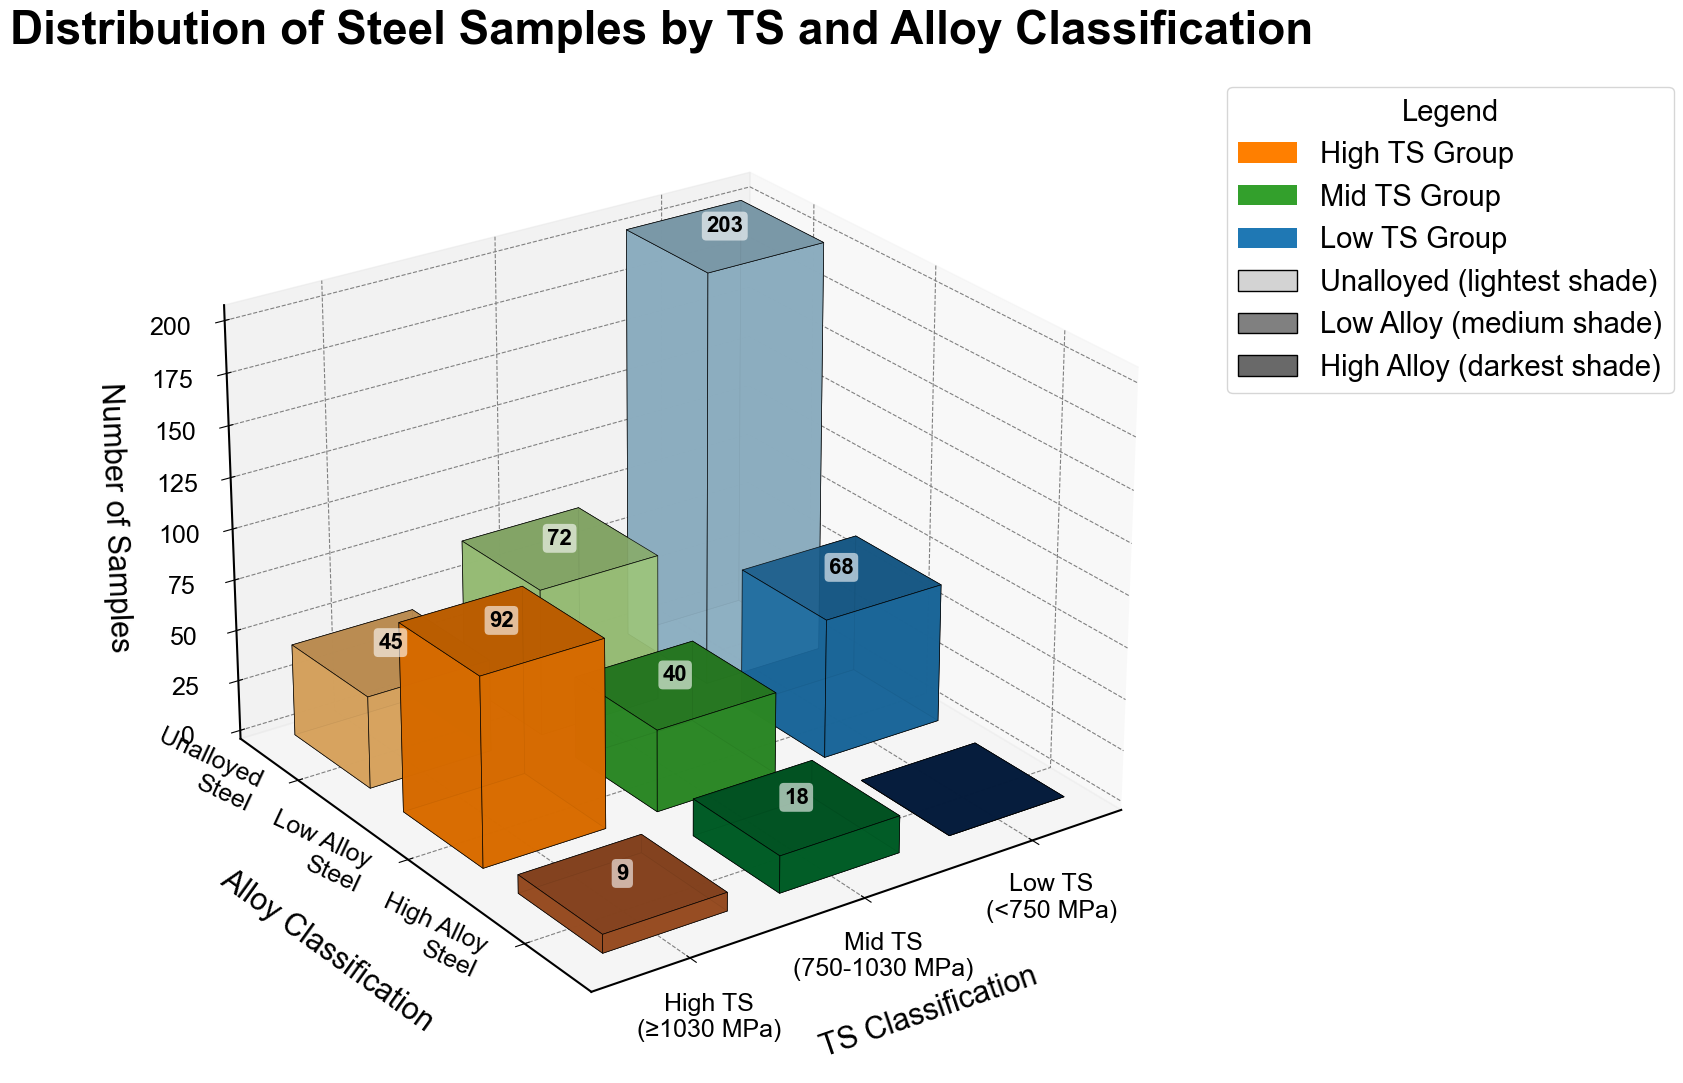


=== ÏÉÅÏÑ∏ Î∂ÑÏÑù Í≤∞Í≥º ===
  lowTS: 271Í∞ú (49.5%)
  midTS: 130Í∞ú (23.8%)
  highTS: 146Í∞ú (26.7%)

=== Ï∂îÍ∞Ä ÏãúÍ∞ÅÌôî: ÏÇ∞Ï†êÎèÑ Î∂ÑÏÑù (Nature Ïä§ÌÉÄÏùº Ï†ÅÏö©) ===


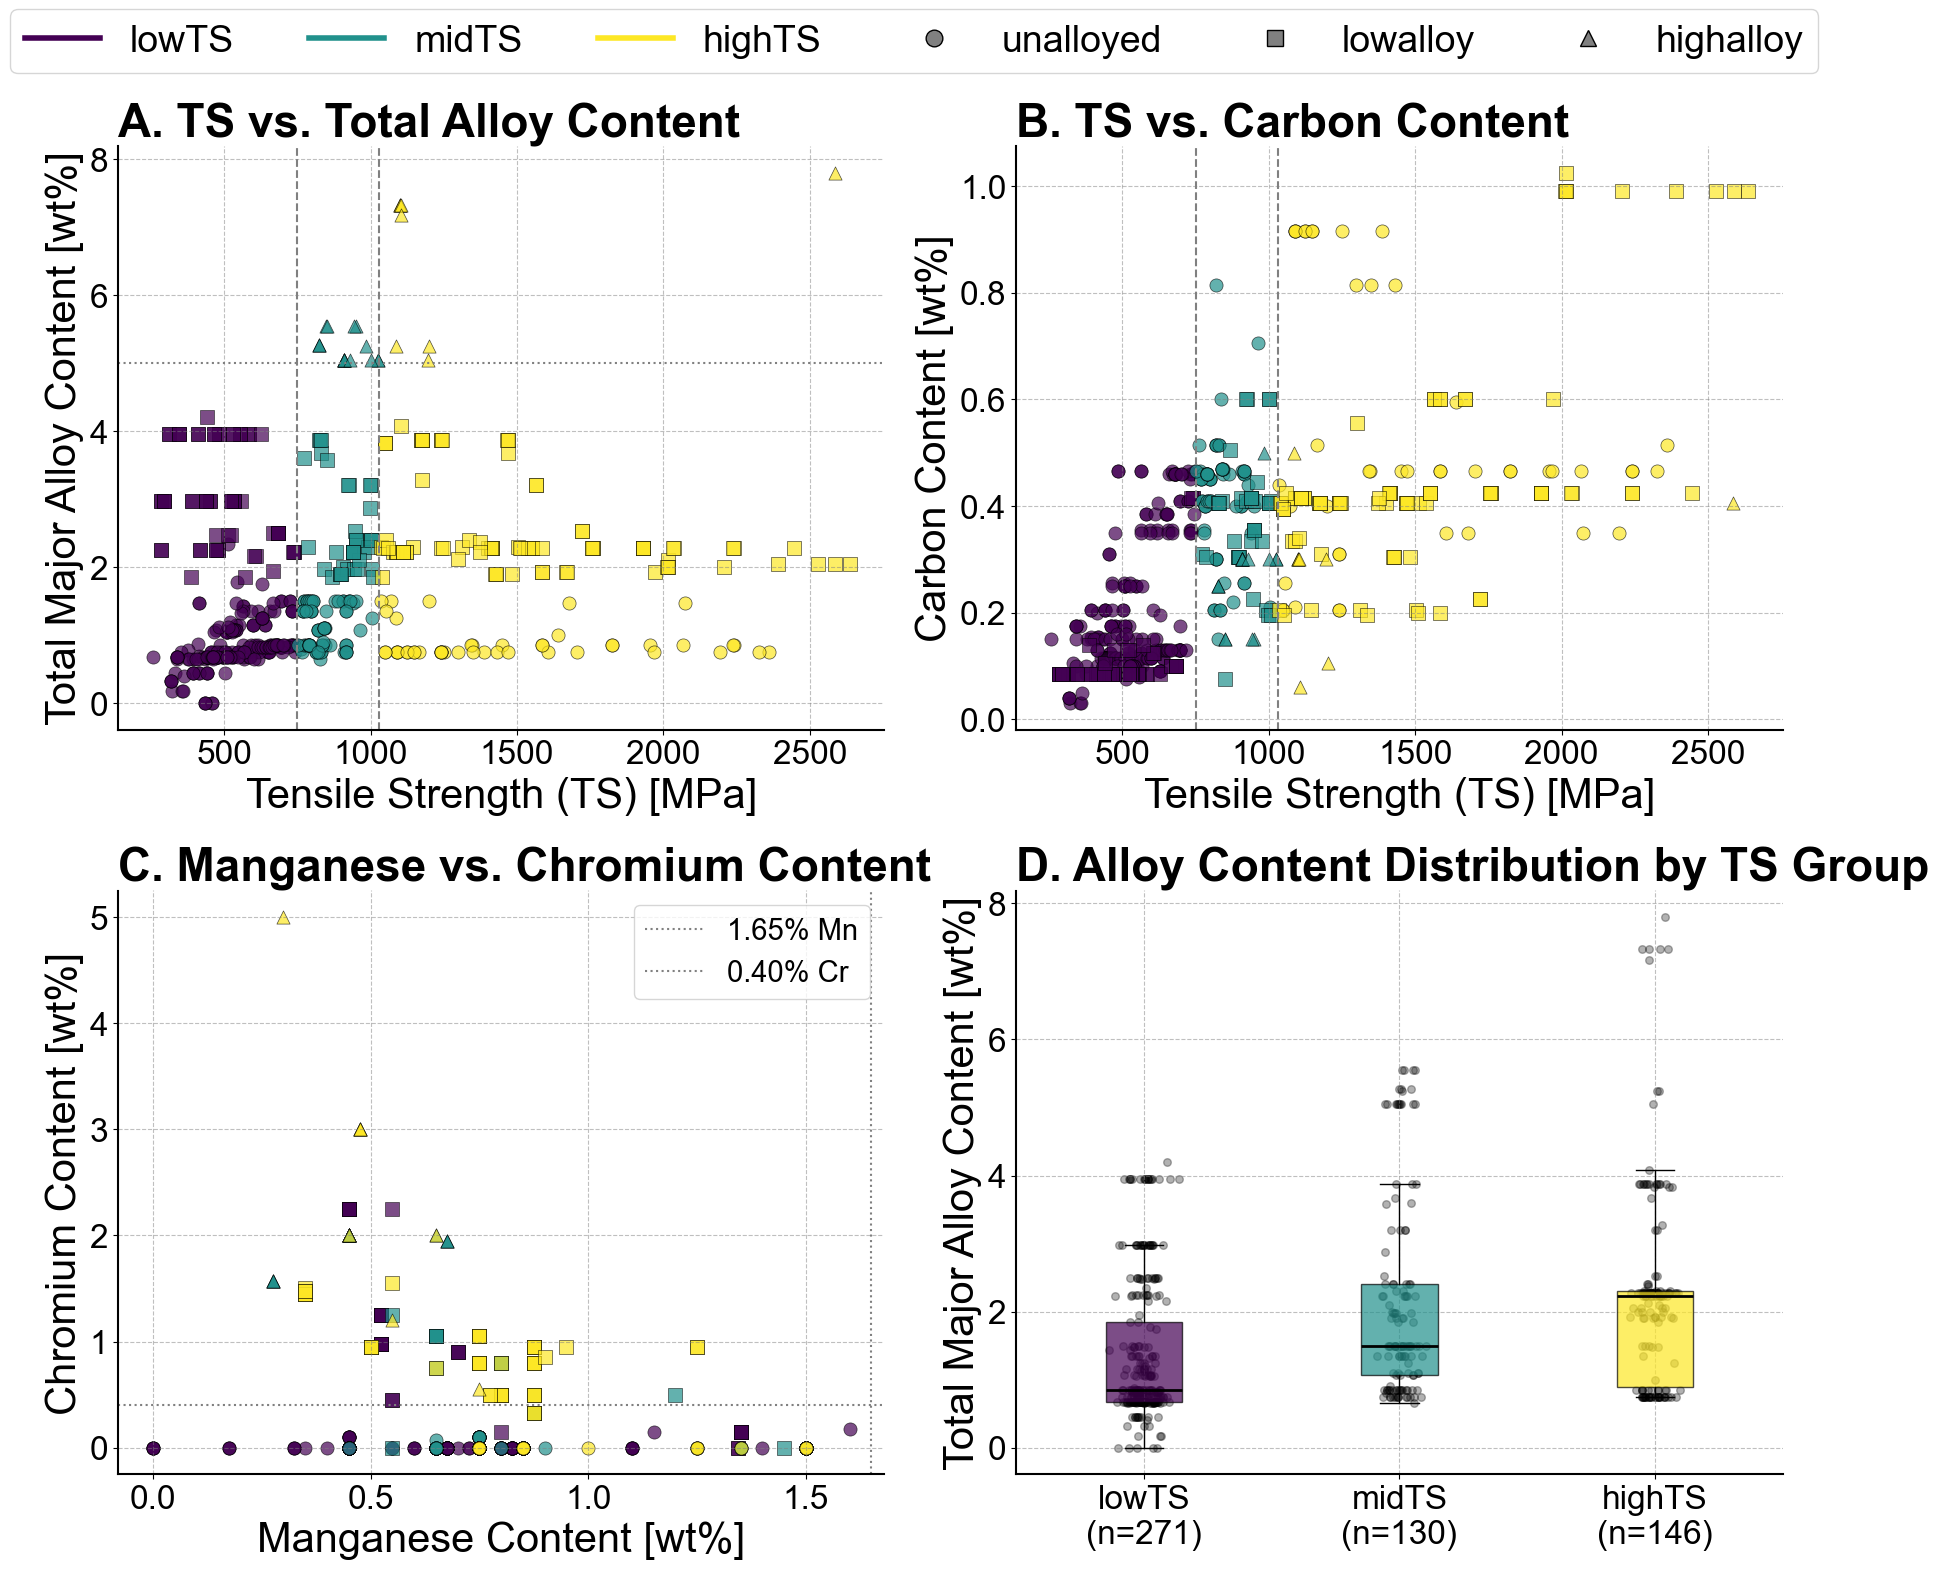


üìç Î≤îÎ°Ä ÏÑ§Î™Ö:
  ÏÉâÏÉÅ - TS Í∑∏Î£π: üî¥ lowTS (<750), üü¢ midTS (750-1030), üîµ highTS (‚â•1030)
  ÎßàÏª§ - Ìï©Í∏àÌÉÄÏûÖ: ‚óè unalloyed, ‚ñ† lowalloy, ‚ñ≤ highalloy

üìä Ï£ºÏöî ÌÜµÍ≥Ñ:
  ÌèâÍ∑† TS: 870.0 ¬± 466.6 MPa
  ÌèâÍ∑† Ï¥ù Ìï©Í∏àÏõêÏÜå: 1.79 ¬± 1.34 wt%
  ÌèâÍ∑† ÌÉÑÏÜåÌï®Îüâ: 0.305 ¬± 0.198 wt%


In [1]:
# 3Ï∞®Ïõê Í∑∏ÎûòÌîÑ: TS Î∂ÑÎ•ò vs Ìï©Í∏à Î∂ÑÎ•ò vs ÏÉòÌîå Ïàò (ÏàòÏ†ïÎêú Î≤ÑÏ†Ñ)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings('ignore')

# === Nature Ï†ÄÎÑê Ïä§ÌÉÄÏùºÏùÑ ÏúÑÌïú Matplotlib Ï†ÑÏó≠ ÏÑ§Ï†ï ===

# 1. Ìè∞Ìä∏ ÏÑ§Ï†ï (Sans-serif Í≥ÑÏó¥ Ï∂îÏ≤ú)
# NatureÏôÄ Í∞ôÏùÄ Ï†ÄÎÑêÏóêÏÑúÎäî Î™ÖÌôïÏÑ±ÏùÑ ÏúÑÌï¥ Sans-serif Ìè∞Ìä∏(Ïòà: Arial, Helvetica)Î•º Í∂åÏû•Ìï©ÎãàÎã§.
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial', 'Helvetica', 'DejaVu Sans']
plt.rcParams['mathtext.fontset'] = 'dejavusans' # ÏàòÏãù Ìè∞Ìä∏

# ÎßåÏïΩ 'Times New Roman' (Serif) Í≥ÑÏó¥ÏùÑ Î∞òÎìúÏãú ÏÇ¨Ïö©Ìï¥Ïïº ÌïúÎã§Î©¥, 
# ÏïÑÎûò 3Ï§ÑÏùò Ï£ºÏÑùÏùÑ Ìï¥Ï†úÌïòÍ≥† ÏúÑÏùò 3Ï§ÑÏùÑ Ï£ºÏÑù Ï≤òÎ¶¨ÌïòÏÑ∏Ïöî.
# plt.rcParams['font.family'] = 'serif'
# plt.rcParams['font.serif'] = ['Times New Roman', 'Times', 'DejaVu Serif', 'serif']
# plt.rcParams['mathtext.fontset'] = 'stix'

# 2. Ï†ÑÏó≠ Ìè∞Ìä∏ ÌÅ¨Í∏∞ Î∞è ÌîåÎ°Ø ÏöîÏÜå Ïä§ÌÉÄÏùº ÏÑ§Ï†ï (1.5Î∞∞ ÌôïÎåÄ)
plt.rcParams['font.size'] = 21
plt.rcParams['axes.labelsize'] = 27
plt.rcParams['axes.titlesize'] = 33
plt.rcParams['xtick.labelsize'] = 21
plt.rcParams['ytick.labelsize'] = 21
plt.rcParams['legend.fontsize'] = 21
plt.rcParams['figure.titlesize'] = 36

# 3. ÌîåÎ°Ø ÏöîÏÜå Ïä§ÌÉÄÏùº
plt.rcParams['axes.linewidth'] = 1.5      # Ï∂ï ÏÑ† ÎëêÍªò
plt.rcParams['lines.linewidth'] = 2.0     # ÎùºÏù∏ ÎëêÍªò
plt.rcParams['grid.linestyle'] = '--'     # Í∑∏Î¶¨Îìú Ïä§ÌÉÄÏùº
plt.rcParams['grid.color'] = 'gray'       # Í∑∏Î¶¨Îìú ÏÉâÏÉÅ
plt.rcParams['grid.alpha'] = 0.5          # Í∑∏Î¶¨Îìú Ìà¨Î™ÖÎèÑ
plt.rcParams['savefig.dpi'] = 300         # Ï†ÄÏû• Ïãú Ìï¥ÏÉÅÎèÑ
plt.rcParams['savefig.format'] = 'png'    # Ï†ÄÏû• Í∏∞Î≥∏ Ìè¨Îß∑

def calculate_average_composition(row, element):
    """
    Í∞Å ÏõêÏÜåÏùò Min, Max Í∞íÏùò ÌèâÍ∑†ÏùÑ Í≥ÑÏÇ∞
    ÎπÑÏñ¥ÏûàÎäî ÏÖÄÏùÄ 0ÏúºÎ°ú Ï≤òÎ¶¨
    """
    min_col = f"{element}_Min"
    max_col = f"{element}_Max"
    
    min_val = row[min_col] if pd.notna(row[min_col]) else 0
    max_val = row[max_col] if pd.notna(row[max_col]) else 0
    
    return (min_val + max_val) / 2

def classify_alloy_type(composition_row):
    """
    ISO 4948 Í∏∞Ï§ÄÏúºÎ°ú Ìï©Í∏à ÌÉÄÏûÖ Î∂ÑÎ•ò
    """
    # Unalloyed Steel Í∏∞Ï§Ä Ï≤¥ÌÅ¨
    unalloyed_criteria = {
        'Mn': 1.65,  # ÎßùÍ∞Ñ 1.65% Ïù¥Ìïò
        'Si': 0.60,  # Ïã§Î¶¨ÏΩò 0.60% Ïù¥Ìïò  
        'Cu': 0.60,  # Íµ¨Î¶¨ 0.60% Ïù¥Ìïò
    }
    
    # Í∏∞ÌÉÄ Ìï©Í∏à ÏõêÏÜå (ÌÅ¨Î°¨, ÎãàÏºà, Î™∞Î¶¨Î∏åÎç¥ Îì±) 0.40% Ïù¥Ìïò
    other_elements = ['Cr', 'Ni', 'Mo', 'V', 'Nb', 'Ti', 'Al']
    
    # ÌÉÑÏÜå Ìï®Îüâ Ï≤¥ÌÅ¨ (2% Ïù¥Ìïò)
    carbon_content = composition_row['C']
    if carbon_content > 2.0:
        return 'highalloy'  # ÌÉÑÏÜå Ìï®ÎüâÏù¥ 2% Ï¥àÍ≥ºÎ©¥ Í≥†Ìï©Í∏àÍ∞ï
    
    # Unalloyed Steel Í∏∞Ï§Ä Ï≤¥ÌÅ¨
    is_unalloyed = True
    
    # ÎßùÍ∞Ñ, Ïã§Î¶¨ÏΩò, Íµ¨Î¶¨ Í∏∞Ï§Ä Ï≤¥ÌÅ¨
    for element, limit in unalloyed_criteria.items():
        if composition_row[element] > limit:
            is_unalloyed = False
            break
    
    # Í∏∞ÌÉÄ Ìï©Í∏à ÏõêÏÜå Í∏∞Ï§Ä Ï≤¥ÌÅ¨ (Í∞ÅÍ∞Å 0.40% Ïù¥Ìïò)
    if is_unalloyed:
        for element in other_elements:
            if composition_row[element] > 0.40:
                is_unalloyed = False
                break
    
    if is_unalloyed:
        return 'unalloyed'
    
    # Ìï©Í∏à ÏõêÏÜå Ï¥ùÌï© Í≥ÑÏÇ∞ (ÌÉÑÏÜå Ï†úÏô∏)
    # Ï£ºÏöî Ìï©Í∏à ÏõêÏÜåÎì§Ïùò Ï¥ùÌï©
    alloy_elements = ['Mn', 'Si', 'Ni', 'Cr', 'Mo', 'Cu', 'V', 'Nb', 'Ti', 'Al']
    total_alloy_content = sum(composition_row[element] for element in alloy_elements)
    
    # Low-alloy vs High-alloy Íµ¨Î∂Ñ
    if total_alloy_content <= 5.0:
        return 'lowalloy'
    else:
        return 'highalloy'

def classify_ts_group(ts_value):
    """TS Í∏∞Ï§ÄÏúºÎ°ú Í∑∏Î£π Î∂ÑÎ•ò"""
    if ts_value < 750:
        return 'lowTS'
    elif 750 <= ts_value < 1030:
        return 'midTS'
    else:
        return 'highTS'

print("=== 3D Î∂ÑÏÑù: TS Î∂ÑÎ•ò vs Ìï©Í∏à Î∂ÑÎ•ò vs ÏÉòÌîå Ïàò (ÏàòÏ†ïÎêú Î≤ÑÏ†Ñ) ===")

try:
    # composition ÏãúÌä∏ÏóêÏÑú Îç∞Ïù¥ÌÑ∞ Î°úÎìú (mainÍ≥º compositionÏùÑ ÎèôÏùºÌïòÍ≤å)
    df_composition = pd.read_excel('TrainSet0507_NoDuplicatesHV.xlsx', sheet_name='composition')
    print(f"composition Îç∞Ïù¥ÌÑ∞ Î°úÎìú ÏôÑÎ£å: {df_composition.shape[0]}Í∞ú Ìñâ, {df_composition.shape[1]}Í∞ú Ïó¥")
    
    # ÏõêÏÜå Î™©Î°ù (Min, Max Ïª¨ÎüºÏù¥ ÏûàÎäî ÏõêÏÜåÎì§)
    elements = ['C', 'Mn', 'P', 'S', 'Si', 'Ni', 'Cr', 'Mo', 'Cu', 'V', 'B', 'Al', 'N', 'Nb', 'Ti']
    
    # Í∞Å ÏõêÏÜåÎ≥ÑÎ°ú ÌèâÍ∑† ÏÑ±Î∂Ñ Í≥ÑÏÇ∞
    for element in elements:
        df_composition[element] = df_composition.apply(lambda row: calculate_average_composition(row, element), axis=1)
    
    # TS Ïª¨ÎüºÏùÑ Ïà´ÏûêÌòïÏúºÎ°ú Î≥ÄÌôò (Î¨∏ÏûêÏó¥ Ï†úÍ±∞)
    df_composition['TS'] = pd.to_numeric(df_composition['TS'], errors='coerce')
    
    # Ìï©Í∏à ÌÉÄÏûÖ Î∂ÑÎ•ò
    df_composition['alloy_type'] = df_composition.apply(lambda row: classify_alloy_type(row), axis=1)
    
    # TSÏôÄ alloy_typeÏùÑ Î™®Îëê Ìè¨Ìï®ÌïòÏó¨ Í≤∞Ï∏°Í∞í Ï†úÍ±∞ (Ïù∏Îç±Ïä§ Î¨∏Ï†ú Ìï¥Í≤∞)
    df_clean = df_composition[['TS', 'alloy_type']].dropna()
    print(f"TSÏôÄ alloy_type Î™®Îëê Ïú†Ìö®Ìïú Îç∞Ïù¥ÌÑ∞: {len(df_clean)}Í∞ú ÏÉòÌîå")
    
    # TS Í∏∞Ï§Ä Î∂ÑÎ•ò Ï∂îÍ∞Ä
    df_clean['ts_group'] = df_clean['TS'].apply(classify_ts_group)
    
    # Ï∂ï ÎùºÎ≤® Ï†ïÏùò (Ï†ÑÏó≠ Î≥ÄÏàòÎ°ú)
    ts_groups = ['lowTS', 'midTS', 'highTS']
    alloy_types = ['unalloyed', 'lowalloy', 'highalloy']
    
    print(f"ÏµúÏ¢Ö Î∂ÑÏÑù Îç∞Ïù¥ÌÑ∞: {len(df_clean)}Í∞ú ÏÉòÌîå")
    
    # Ï£ºÏöî Ìï©Í∏à ÏõêÏÜå Ï¥ùÌï© Í≥ÑÏÇ∞ (ÎØ∏Î¶¨ Í≥ÑÏÇ∞)
    major_alloy_elements = ['Mn', 'Si', 'Ni', 'Cr', 'Mo', 'Cu']
    df_composition['total_major_alloy'] = df_composition[major_alloy_elements].sum(axis=1)
    
    print("Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ ÏôÑÎ£å!")
    
except Exception as e:
    print(f"Îç∞Ïù¥ÌÑ∞ Î°úÎî© Î∞è Ï†ÑÏ≤òÎ¶¨ Ï§ë Ïò§Î•ò: {e}")
    import traceback
    traceback.print_exc()

# 3D Î∞î Ï∞®Ìä∏ ÏÉùÏÑ±

# --- ÏàòÏ†ï 1: TS Ï∂ï ÏàúÏÑú Î∞òÏ†Ñ ---
# ÏöîÏ≤≠Ïóê Îî∞Îùº TS Ï∂ïÏùò ÏàúÏÑúÎ•º high -> mid -> low Î°ú Ï†ïÎ†¨ÌïòÍ∏∞ ÏúÑÌï¥ Î¶¨Ïä§Ìä∏Î•º Îí§ÏßëÏäµÎãàÎã§.
# Ï§ëÏöî: Ïù¥ ÏΩîÎìúÎäî try Î∏îÎ°ù Î∞ñÏóê ÏúÑÏπòÌï¥Ïïº Ìï©ÎãàÎã§.
ts_groups_reversed = ts_groups[::-1]

# --- ÏàòÏ†ï 2: Alloy Ï∂ï ÏàúÏÑú Î∞òÏ†Ñ ---
# Alloy ÌÉÄÏûÖ ÏàúÏÑúÎ•º high -> low -> unalloy Î°ú ÏàòÏ†ï
alloy_types_reversed = alloy_types[::-1]

try:
    # Í∑∏Î£πÎ≥Ñ ÏÉòÌîå Ïàò Í≥ÑÏÇ∞
    group_counts = df_clean.groupby(['ts_group', 'alloy_type']).size().reset_index(name='count')
    
    print("\n=== Í∑∏Î£πÎ≥Ñ ÏÉòÌîå Ïàò ===")
    for _, row in group_counts.iterrows():
        print(f"{row['ts_group']} + {row['alloy_type']}: {row['count']}Í∞ú")

    # Ï†ÑÎ¨∏Ï†ÅÏù∏ ÏÉâÏÉÅ ÌåîÎ†àÌä∏ Ï†ïÏùò
    colors = {
        ('lowTS', 'unalloyed'): '#a6cee3', ('lowTS', 'lowalloy'): '#1f78b4', ('lowTS', 'highalloy'): '#08306b',
        ('midTS', 'unalloyed'): '#b2df8a', ('midTS', 'lowalloy'): '#33a02c', ('midTS', 'highalloy'): '#006d2c',
        ('highTS', 'unalloyed'): '#fdbf6f', ('highTS', 'lowalloy'): '#ff7f00', ('highTS', 'highalloy'): '#b15928',
    }
    
    # 3D ÌîåÎ°Ø ÏÉùÏÑ±
    fig = plt.figure(figsize=(16, 13))
    ax = fig.add_subplot(111, projection='3d')
    
    # Ï¢åÌëú Î∞è ÎÜíÏù¥ Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ (ÏàòÏ†ïÎêú ts_groups_reversedÏôÄ alloy_types_reversed ÏÇ¨Ïö©)
    x_coords, y_coords, heights, bar_colors = [], [], [], []
    for i, ts_group in enumerate(ts_groups_reversed): # reversed list ÏÇ¨Ïö©
        for j, alloy_type in enumerate(alloy_types_reversed): # reversed list ÏÇ¨Ïö©
            count_val = group_counts[(group_counts['ts_group'] == ts_group) & (group_counts['alloy_type'] == alloy_type)]['count'].values
            count = count_val[0] if len(count_val) > 0 else 0
            x_coords.append(i)
            y_coords.append(j)
            heights.append(count)
            bar_colors.append(colors.get((ts_group, alloy_type), '#DDDDDD'))

    # 3D Î∞î Ï∞®Ìä∏ ÏÉùÏÑ±
    dx = dy = 0.7
    ax.bar3d(x_coords, y_coords, [0]*len(heights), dx, dy, heights, color=bar_colors, alpha=0.9, edgecolor='black', linewidth=0.5)

    # Î∞î ÏúÑÏóê Ïà´Ïûê ÌëúÏãú
    for x, y, h in zip(x_coords, y_coords, heights):
        if h > 5: 
            ax.text(x + dx/2, y + dy/2, h, f'{int(h)}', ha='center', va='bottom', fontsize=16, fontweight='bold',
                    bbox=dict(facecolor='white', alpha=0.6, edgecolor='none', boxstyle='round,pad=0.2'))

    # Ï∂ï Î†àÏù¥Î∏î Í∞ÑÍ≤© Ï°∞Ï†ï
    ax.set_xlabel('TS Classification', fontsize=22, labelpad=40)
    ax.set_ylabel('Alloy Classification', fontsize=22, labelpad=35)
    ax.set_zlabel('Number of Samples', fontsize=22, labelpad=30)
    
    # --- ÏàòÏ†ï 2: TS Ï∂ï Î†àÏù¥Î∏î ÏàúÏÑú Î∞òÏ†Ñ ---
    # Îç∞Ïù¥ÌÑ∞ ÏàúÏÑúÍ∞Ä high -> mid -> lowÎ°ú Î≥ÄÍ≤ΩÎêòÏóàÏúºÎØÄÎ°ú, Î†àÏù¥Î∏îÎèÑ ÎèôÏùºÌïú ÏàúÏÑúÎ°ú ÏßÄÏ†ïÌï©ÎãàÎã§.
    ax.set_xticks(np.arange(len(ts_groups_reversed)) + dx/2)
    ax.set_xticklabels([f'High TS\n(‚â•1030 MPa)', f'Mid TS\n(750-1030 MPa)', f'Low TS\n(<750 MPa)'], fontsize=18)
    
    # Alloy Ï∂ï Î†àÏù¥Î∏î ÏÑ§Ï†ï (ÏàúÏÑúÎäî high -> low -> unalloy Î°ú ÏàòÏ†ï)
    ax.set_yticks(np.arange(len(alloy_types_reversed)) + dy/2)
    ax.set_yticklabels([f'High Alloy\nSteel', f'Low Alloy\nSteel', f'Unalloyed\nSteel'], 
                       fontsize=18, rotation=-25, va='bottom', ha='right') # ÌöåÏ†ÑÍ∞Å Î∞è Ï†ïÎ†¨ ÏàòÏ†ï
    
    # --- ÏàòÏ†ï 3: Alloy(Y) Ï∂ï Ìã±Í≥º Î†àÏù¥Î∏î ÏÇ¨Ïù¥ Í∞ÑÍ≤© Ï°∞Ï†ï ---
    # pad Í∞íÏùÑ ÎäòÎ†§ Ìã± Î†àÏù¥Î∏îÏù¥ Í∑∏ÎûòÌîÑÏôÄ Ï∂©Î∂ÑÌûà Îñ®Ïñ¥ÏßÄÎèÑÎ°ù Ìï©ÎãàÎã§.
    ax.tick_params(axis='x', pad=10)
    ax.tick_params(axis='y', pad=15) # Í∏∞Ï°¥ 5ÏóêÏÑú 15Î°ú Ï¶ùÍ∞Ä
    ax.tick_params(axis='z', pad=15)
    ax.tick_params(axis='z', labelsize=18)

    # Ï†úÎ™©
    ax.set_title('Distribution of Steel Samples by TS and Alloy Classification', 
                 fontweight='bold', pad=20)
    
    # Î†àÏù¥ÏïÑÏõÉ Î∞è Î∑∞ Í∞úÏÑ†
    ax.view_init(elev=25, azim=-125)
    
    # Î≤îÎ°Ä ÏÉùÏÑ± (Ïù¥Ï†ÑÍ≥º ÎèôÏùº)
    from matplotlib.patches import Patch
    legend_elements = [
        Patch(facecolor='#ff7f00', label='High TS Group'), # Î≤îÎ°Ä ÏàúÏÑúÎèÑ Îç∞Ïù¥ÌÑ∞Ïóê ÎßûÍ≤å ÏàòÏ†ï
        Patch(facecolor='#33a02c', label='Mid TS Group'),
        Patch(facecolor='#1f78b4', label='Low TS Group'),
        Patch(facecolor='lightgray', edgecolor='black', label='Unalloyed (lightest shade)'),
        Patch(facecolor='gray', edgecolor='black', label='Low Alloy (medium shade)'),
        Patch(facecolor='dimgray', edgecolor='black', label='High Alloy (darkest shade)'),
    ]
    ax.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1.05, 1), title="Legend")
    
    plt.tight_layout(rect=[0, 0, 0.85, 1])
    plt.show()
    
    # Í≥†Ìï¥ÏÉÅÎèÑ Ïù¥ÎØ∏ÏßÄÎ°ú Ï†ÄÏû•
    # fig.savefig("Fig1_3D_Distribution_v3.pdf", bbox_inches='tight')
    
    # (Ïù¥Ìïò ÌÜµÍ≥Ñ Ï∂úÎ†• ÏΩîÎìúÎäî ÎèôÏùº)
    print(f"\n=== ÏÉÅÏÑ∏ Î∂ÑÏÑù Í≤∞Í≥º ===")
    ts_counts = df_clean['ts_group'].value_counts()
    for ts_group in ts_groups:
        count = ts_counts.get(ts_group, 0)
        print(f"  {ts_group}: {count}Í∞ú ({(count / len(df_clean)) * 100:.1f}%)")

except Exception as e:
    print(f"3D ÌîåÎ°Ø ÏÉùÏÑ± Ï§ë Ïò§Î•ò: {e}")
    import traceback
    traceback.print_exc()

# Ï∂îÍ∞Ä ÏãúÍ∞ÅÌôî: ÏÇ∞Ï†êÎèÑ (Scatter Plot)
try:
    print(f"\n=== Ï∂îÍ∞Ä ÏãúÍ∞ÅÌôî: ÏÇ∞Ï†êÎèÑ Î∂ÑÏÑù (Nature Ïä§ÌÉÄÏùº Ï†ÅÏö©) ===")
    
    # ÌïÑÏöîÌïú Î≥ÄÏàòÎì§ Ï†ïÏùò (Ïù¥Ï†Ñ ÏÖÄÏóêÏÑú Ï†ïÏùòÎêòÏßÄ ÏïäÏùÄ Í≤ΩÏö∞ ÎåÄÎπÑ)
    if 'ts_groups' not in globals():
        ts_groups = ['lowTS', 'midTS', 'highTS']
    if 'alloy_types' not in globals():
        alloy_types = ['unalloyed', 'lowalloy', 'highalloy']
    if 'major_alloy_elements' not in globals():
        major_alloy_elements = ['Mn', 'Si', 'Ni', 'Cr', 'Mo', 'Cu']
    
    # ÌïÑÏöîÌïú Í≤ΩÏö∞ Ìï©Í∏à ÏõêÏÜå Ï¥ùÌï© Í≥ÑÏÇ∞
    if 'total_major_alloy' not in df_composition.columns:
        df_composition['total_major_alloy'] = df_composition[major_alloy_elements].sum(axis=1)
    
    # Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ ÏΩîÎìúÎäî ÏõêÎ≥∏ Ïú†ÏßÄ
    df_clean = df_clean.copy() # SettingWithCopyWarning Î∞©ÏßÄ
    df_clean['total_major_alloy'] = df_composition.loc[df_clean.index, 'total_major_alloy']
    df_clean['carbon_content'] = df_composition.loc[df_clean.index, 'C']
    df_clean['manganese_content'] = df_composition.loc[df_clean.index, 'Mn']
    df_clean['chromium_content'] = df_composition.loc[df_clean.index, 'Cr']

    # 1. Ï†ÑÎ¨∏Ï†ÅÏù∏ ÏÉâÏÉÅ Î∞è ÎßàÏª§ ÌåîÎ†àÌä∏ Ï†ïÏùò
    from matplotlib.cm import get_cmap
    viridis = get_cmap('viridis', 3)
    ts_colors = {'lowTS': viridis(0.1), 'midTS': viridis(0.5), 'highTS': viridis(0.9)}
    alloy_markers = {'unalloyed': 'o', 'lowalloy': 's', 'highalloy': '^'}

    # 2x2 ÏÑúÎ∏åÌîåÎ°Ø ÏÉùÏÑ±
    fig, axes = plt.subplots(2, 2, figsize=(18, 16))
    
    # --- A. TS vs Ï¥ù Ìï©Í∏à ÏõêÏÜå Ìï®Îüâ ---
    ax = axes[0, 0]
    for ts_group in ts_groups:
        for alloy_type in alloy_types:
            subset = df_clean[(df_clean['ts_group'] == ts_group) & (df_clean['alloy_type'] == alloy_type)]
            if not subset.empty:
                ax.scatter(subset['TS'], subset['total_major_alloy'],
                           c=[ts_colors[ts_group]], marker=alloy_markers[alloy_type],
                           s=90, alpha=0.7, edgecolors='k', linewidth=0.5)
    ax.axvline(x=750, c='gray', ls='--', lw=1.5)
    ax.axvline(x=1030, c='gray', ls='--', lw=1.5)
    ax.axhline(y=5.0, c='gray', ls=':', lw=1.5, label='5% Alloy')
    ax.set_xlabel('Tensile Strength (TS) [MPa]', fontsize=30)
    ax.set_ylabel('Total Major Alloy Content [wt%]', fontsize=30)
    ax.set_title('A. TS vs. Total Alloy Content', loc='left', fontweight='bold')

    # --- B. TS vs ÌÉÑÏÜå Ìï®Îüâ ---
    ax = axes[0, 1]
    for ts_group in ts_groups:
        for alloy_type in alloy_types:
            subset = df_clean[(df_clean['ts_group'] == ts_group) & (df_clean['alloy_type'] == alloy_type)]
            if not subset.empty:
                ax.scatter(subset['TS'], subset['carbon_content'],
                           c=[ts_colors[ts_group]], marker=alloy_markers[alloy_type],
                           s=90, alpha=0.7, edgecolors='k', linewidth=0.5)
    ax.axvline(x=750, c='gray', ls='--', lw=1.5)
    ax.axvline(x=1030, c='gray', ls='--', lw=1.5)
    ax.set_xlabel('Tensile Strength (TS) [MPa]', fontsize=30)
    ax.set_ylabel('Carbon Content [wt%]', fontsize=30)
    ax.set_title('B. TS vs. Carbon Content', loc='left', fontweight='bold')

    # --- C. ÎßùÍ∞Ñ vs ÌÅ¨Î°¨ Ìï®Îüâ ---
    ax = axes[1, 0]
    for ts_group in ts_groups:
        for alloy_type in alloy_types:
            subset = df_clean[(df_clean['ts_group'] == ts_group) & (df_clean['alloy_type'] == alloy_type)]
            if not subset.empty:
                ax.scatter(subset['manganese_content'], subset['chromium_content'],
                           c=[ts_colors[ts_group]], marker=alloy_markers[alloy_type],
                           s=90, alpha=0.7, edgecolors='k', linewidth=0.5)
    ax.axvline(x=1.65, c='gray', ls=':', lw=1.5, label='1.65% Mn')
    ax.axhline(y=0.40, c='gray', ls=':', lw=1.5, label='0.40% Cr')
    ax.set_xlabel('Manganese Content [wt%]', fontsize=30)
    ax.set_ylabel('Chromium Content [wt%]', fontsize=30)
    ax.set_title('C. Manganese vs. Chromium Content', loc='left', fontweight='bold')
    ax.legend()
    
    # --- D. TS Í∑∏Î£πÎ≥Ñ Î∞ïÏä§ÌîåÎ°Ø (Ï¥ù Ìï©Í∏à ÏõêÏÜå) ---
    ax = axes[1, 1]
    box_data = [df_clean[df_clean['ts_group'] == g]['total_major_alloy'].dropna() for g in ts_groups]
    bp = ax.boxplot(box_data, patch_artist=True, showfliers=False,
                    labels=[f'{g}\n(n={len(d)})' for g, d in zip(ts_groups, box_data)])
    for patch, color in zip(bp['boxes'], ts_colors.values()):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)
    for median in bp['medians']:
        median.set(color='black', linewidth=2)
    for i, d in enumerate(box_data):
        x_coords = np.random.normal(i + 1, 0.04, len(d))
        ax.scatter(x_coords, d, alpha=0.3, s=30, color='black', zorder=0)
    ax.set_ylabel('Total Major Alloy Content [wt%]', fontsize=30)
    ax.set_title('D. Alloy Content Distribution by TS Group', loc='left', fontweight='bold')
    
    # Î™®Îì† ÏÑúÎ∏åÌîåÎ°Ø Ïä§ÌÉÄÏùº ÌÜµÏùº
    for ax in axes.flatten():
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.tick_params(axis='both', which='major', labelsize=24)
        ax.grid(True)

    # ÌÜµÌï© Î≤îÎ°Ä ÏÉùÏÑ±
    from matplotlib.lines import Line2D
    legend_elements = [
        Line2D([0], [0], color=c, lw=4, label=g) for g, c in ts_colors.items()
    ] + [
        Line2D([0], [0], marker=m, color='w', label=a, linestyle='None', 
               markersize=12, markeredgecolor='k', markerfacecolor='gray') for a, m in alloy_markers.items()
    ]
    fig.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, 1.0), ncol=len(legend_elements), fontsize=27)

    plt.tight_layout(rect=[0, 0, 1, 0.95]) # Î≤îÎ°Ä Í≥µÍ∞Ñ ÌôïÎ≥¥
    plt.show()

    # Ïù¥ÎØ∏ÏßÄ Ï†ÄÏû•
    # fig.savefig("Fig2_Scatter_Analysis.pdf", bbox_inches='tight')
    # fig.savefig("Fig2_Scatter_Analysis.png", bbox_inches='tight', dpi=300)
    
    # Î≤îÎ°Ä ÏÑ§Î™Ö
    print(f"\nüìç Î≤îÎ°Ä ÏÑ§Î™Ö:")
    print(f"  ÏÉâÏÉÅ - TS Í∑∏Î£π: üî¥ lowTS (<750), üü¢ midTS (750-1030), üîµ highTS (‚â•1030)")
    print(f"  ÎßàÏª§ - Ìï©Í∏àÌÉÄÏûÖ: ‚óè unalloyed, ‚ñ† lowalloy, ‚ñ≤ highalloy")
    
    # ÌÜµÍ≥Ñ ÏöîÏïΩ
    print(f"\nüìä Ï£ºÏöî ÌÜµÍ≥Ñ:")
    print(f"  ÌèâÍ∑† TS: {df_clean['TS'].mean():.1f} ¬± {df_clean['TS'].std():.1f} MPa")
    print(f"  ÌèâÍ∑† Ï¥ù Ìï©Í∏àÏõêÏÜå: {df_clean['total_major_alloy'].mean():.2f} ¬± {df_clean['total_major_alloy'].std():.2f} wt%")
    print(f"  ÌèâÍ∑† ÌÉÑÏÜåÌï®Îüâ: {df_clean['carbon_content'].mean():.3f} ¬± {df_clean['carbon_content'].std():.3f} wt%")
    
except Exception as e:
    print(f"ÏÇ∞Ï†êÎèÑ ÏÉùÏÑ± Ï§ë Ïò§Î•ò: {e}")
    import traceback
    traceback.print_exc()
